# **Final Projects 3 - Ensemble**

Name: Sarah Aristawidya

Class: PYTN-KS19

# **Introduction**
<hr>

## Background

With the dataset "heart_failure_clinical_records_dataset.csv," this project aims to analyze, understand, and predict factors influencing the risk of death in patients due to heart failure. The dataset provides extensive clinical information, including age, gender, serum creatinine levels, and other parameters that may affect health conditions.

The analysis process begins with exploring the distribution of serum creatinine levels based on gender to understand population characteristics. Subsequently, data processing, dataset splitting, and training data visualization using scatter plots for two features, namely age and serum creatinine levels, are performed.

Resampling techniques such as SMOTE, ENN, and SMOTEENN are applied to address class imbalance. The data is then standardized using StandardScaler. Various classification models such as Random Forest and Gradient Boosting are trained to predict patient death based on clinical features.

Model evaluation is conducted using metrics such as accuracy, precision, recall, and F1-score. The confusion matrix is also used to provide further insights into classification performance. This analysis aims to provide an in-depth understanding of factors contributing to the risk of death and build a predictive model for use in clinical contexts.

Furthermore, visualizations are applied to compare prediction results from different models using techniques such as the confusion matrix display. Prediction results from each model are evaluated using precision, recall, and F1-score metrics.

Finally, using this dataset, a probability analysis of predicting patient death based on the best-performing model is conducted. The resulting DataFrame of prediction outcomes provides an overview of the probability of patients dying or surviving, along with actual prediction results and conclusions about whether the predictions are correct or incorrect.

This project provides a deeper understanding of factors influencing the risk of death in patients with heart failure, laying the foundation for improved clinical decision-making.

## Overview

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan


**Project Overview**

Data ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung.


**Attribute Information:**
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-u


**Objectives:**

The purpose of this Final Project 3 is to evaluate the concept of Ensemble as follows:
* Able to understand the concept of Classification with Ensemble Models
* Able to prepare data for use in Ensemble Models
* Able to implement Ensemble Models to make predictions

**Dataset Link** : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

# **Import Libraries**
<hr>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.integrate import simps

# Import Libraries for Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Import Libraries for Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load

# Import Libraries for Oversampling and Undersampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.combine import SMOTETomek,SMOTEENN

pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])

# **Data Loading**
Data loading is the process of acquiring, importing, or retrieving data from various sources 
<hr>
Load Data: Reading a CSV file into a DataFrame using the pandas library.

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.columns = df.columns.str.lower()

# Show 5 data head and tail
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# Show how many rows and columns in dataset
print(df.shape)
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

(299, 13)
Number of Rows		: 299
Number of Columns	: 13


In [4]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **Data Cleaning**
Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, inaccuracies, and incomplete parts from a dataset. 
<hr>

In [5]:
# Check the number of missing values in the dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In order to make things clearer, cccess the "death_event" column in the DataFrame df and assign new values then replace 0 with "Survived" and 1 with "Dead" in the "death_event" column.

In [6]:
df["death_event"] = df["death_event"].replace({0: "Survived", 1: "Dead"})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,Dead
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,Dead
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,Dead
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,Dead
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,Dead


In [7]:
# Create a DataFrame summarizing various statistics for each column in the original DataFrame df
pd.DataFrame({
    "type": df.dtypes.values,  # Extract and display the data types of each column
    "null": df.isnull().sum().values,  # Count and display the number of null values in each column
    "null_percentage": df.isnull().sum().values / len(df) * 100,  # Calculate and display the percentage of null values for each column
    "unique": [df[i].nunique() for i in df.columns],  # Count and display the number of unique values in each column
    "sample": [list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]  # Extract a random sample from the unique values in each column
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)

,type,null,null_percentage,unique,sample
age,float64,0,0.0,47,54.0
anaemia,int64,0,0.0,2,1
creatinine_phosphokinase,int64,0,0.0,208,190
diabetes,int64,0,0.0,2,0
ejection_fraction,int64,0,0.0,17,60
high_blood_pressure,int64,0,0.0,2,1
platelets,float64,0,0.0,176,248000.0
serum_creatinine,float64,0,0.0,40,2.2
serum_sodium,int64,0,0.0,27,143
sex,int64,0,0.0,2,1


In [8]:
# Define a list of categorical column names
cat_cols = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "death_event"]
# Define a list of numerical column names using list comprehension
num_cols = [i for i in df.columns if i not in cat_cols]

# Display information about categorical and numerical columns
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")
print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")

Categorical Columns	(6)	: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']
Numerical Columns	(7)	: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [9]:
# Function to create a boxplot grid for specified columns in a DataFrame
def create_boxplot(nrows, ncols, data, x_axis, box_color="#E7BCDE"):
    # Create a figure with subplots based on the specified number of rows and columns
    fig, ax = plt.subplots(nrows, ncols, figsize=(25, 15), dpi=200)

    # Counter for tracking the index of the x_axis list
    n = 0

    # Loop through the subplots and create boxplots for each specified column
    for nrow in range(nrows):
        for ncol in range(ncols):
            sns.boxplot(data=data, x=x_axis[n], ax=ax[nrow, ncol], color=box_color)
            ax[nrow, ncol].set_title(f"Box Plot of {x_axis[n]}")
            n += 1
            # Break the loop if all specified columns have been plotted
            if n == len(x_axis):
                break

    # Remove empty subplots (axes) if any
    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Function to find outliers in a numerical dataset using the IQR method
def find_outlier(data):
    # Calculate the first and third quartiles
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define the minimum and maximum values for outliers
    min_IQR = Q1 - (1.5 * IQR)
    max_IQR = Q3 + (1.5 * IQR)
    
    # Find outliers and store them in a list
    outlier = [i for i in data if (i < min_IQR) or (i > max_IQR)]
    
    return outlier

# Function to display the number and percentage of outliers for each specified variable
def show_outlier(data, variables):
    return pd.DataFrame({
        "outliers": [len(find_outlier(data[i])) for i in variables],
        "percentage": np.array([len(find_outlier(data[i])) for i in variables]) / len(data) * 100
    }).set_index([variables]).sort_values("outliers", ascending=False)

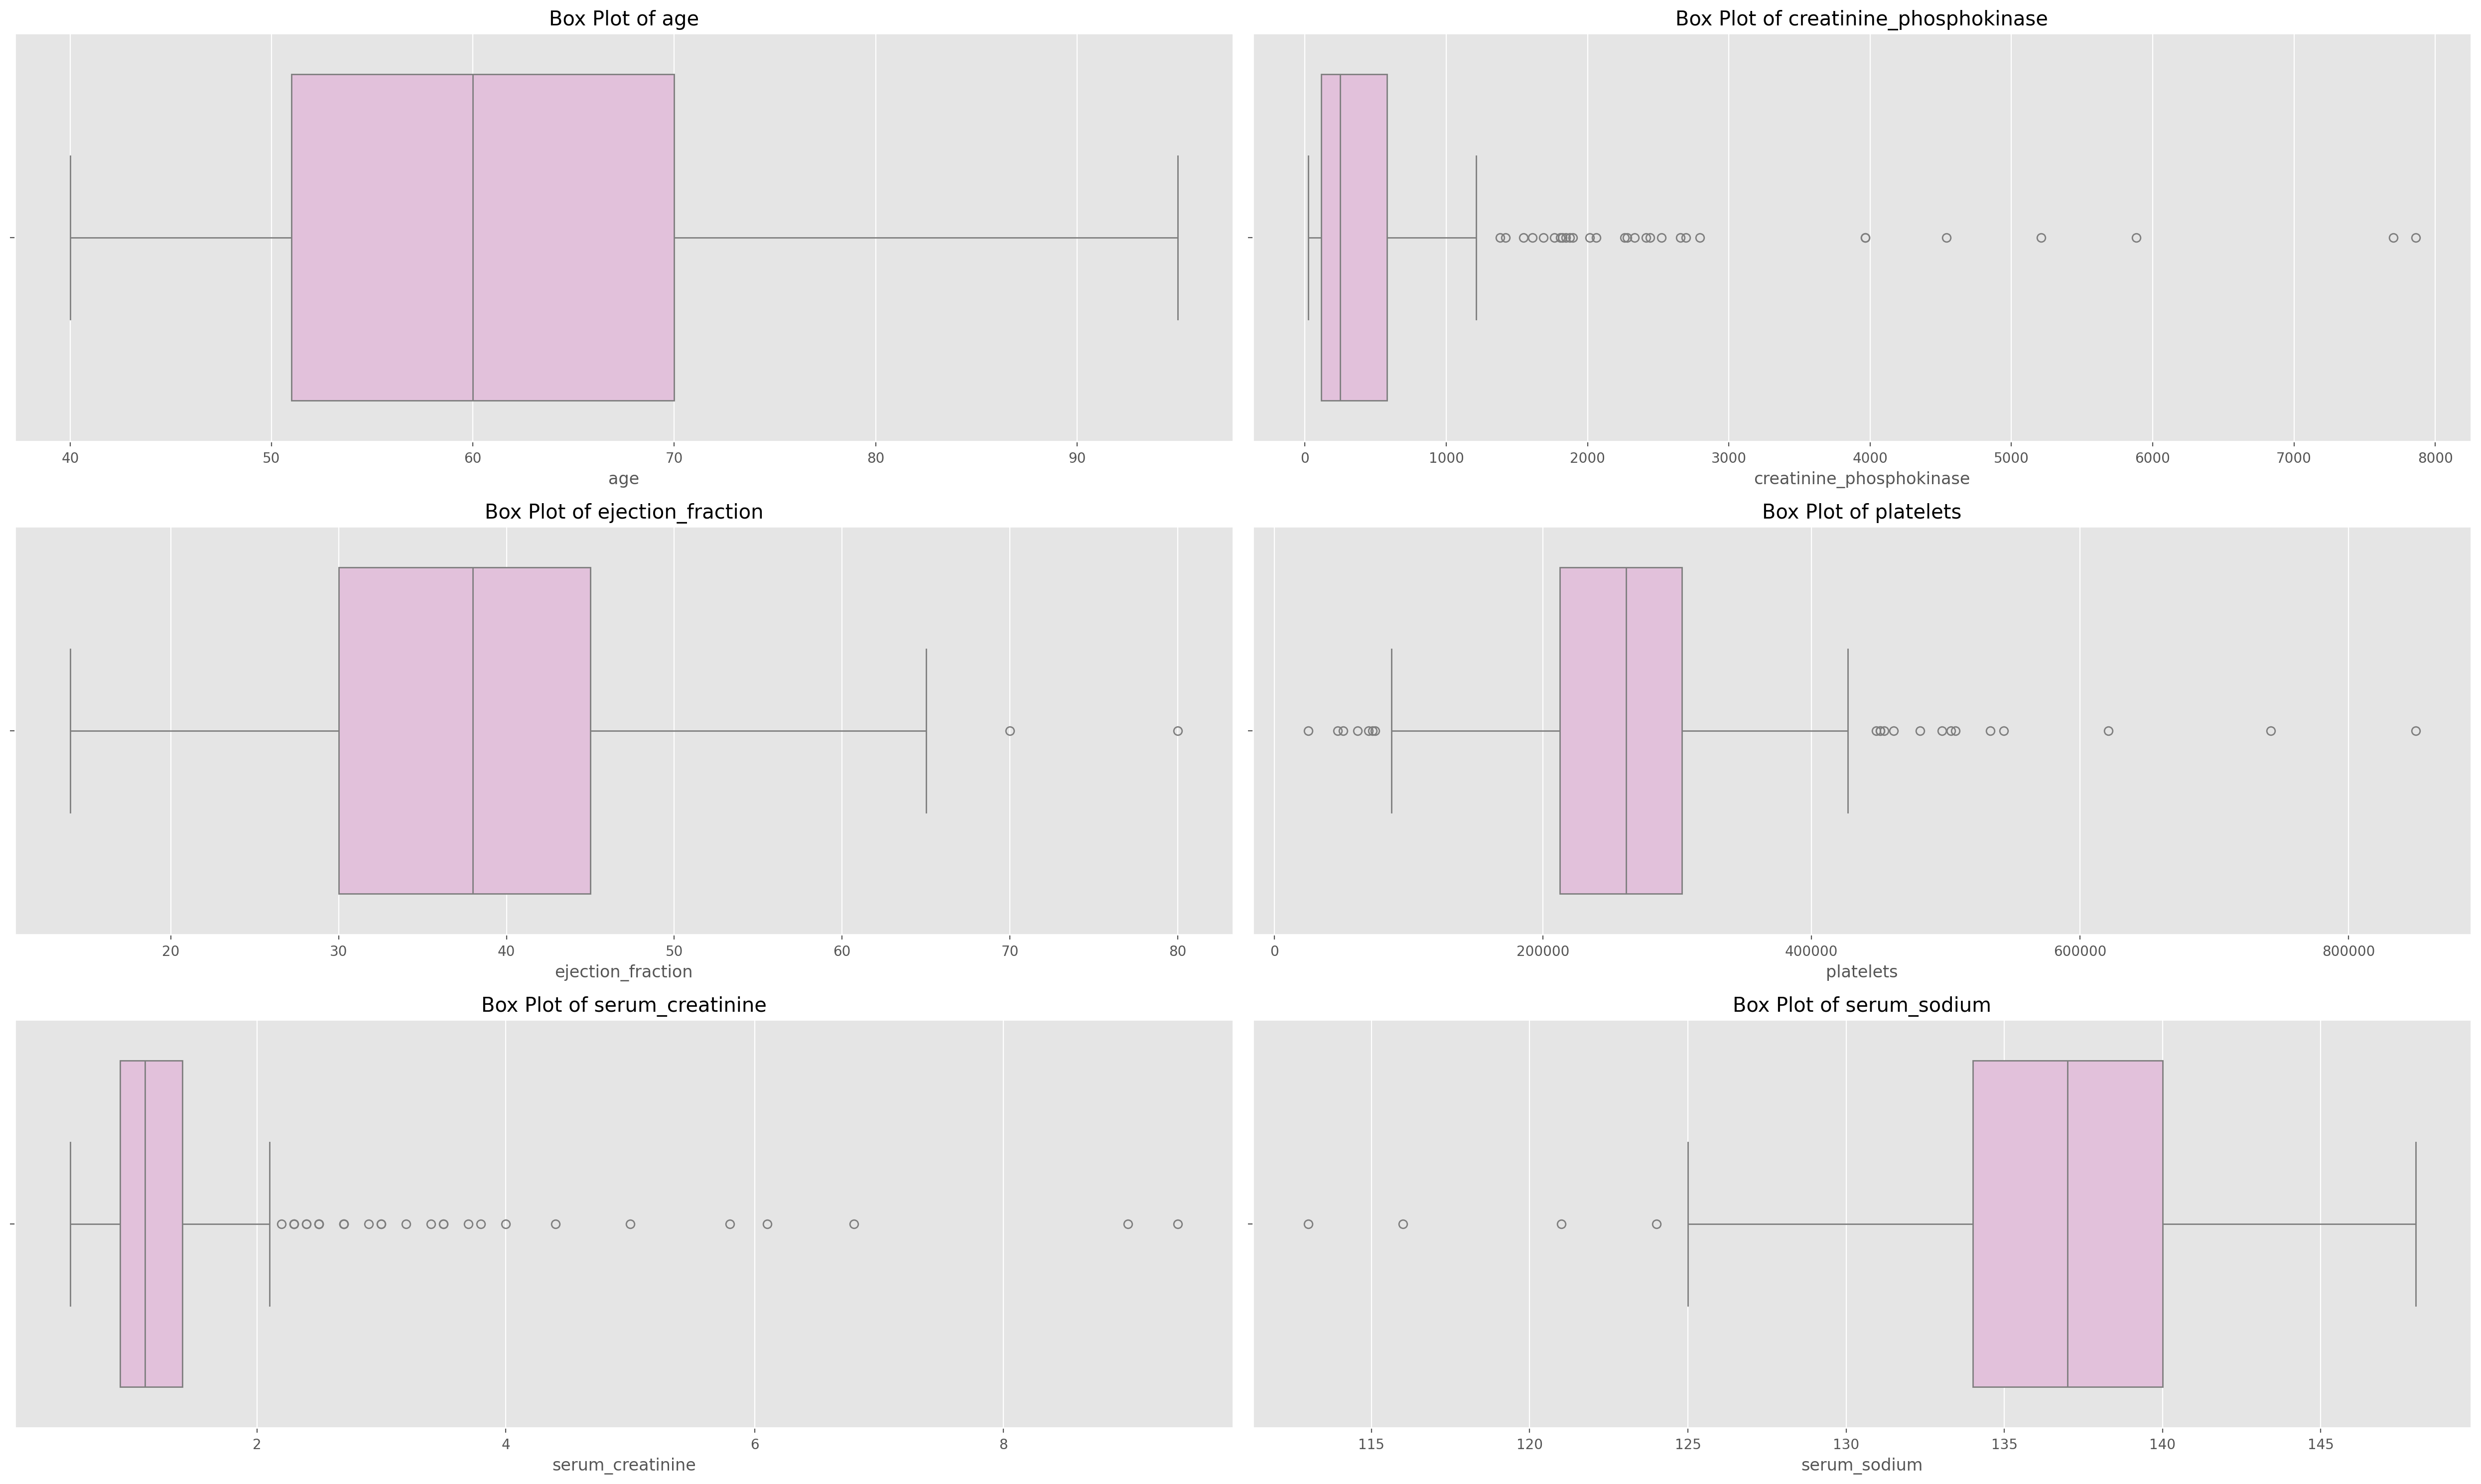

,outliers,percentage
creatinine_phosphokinase,29,9.698997
serum_creatinine,29,9.698997
platelets,21,7.023411
serum_sodium,4,1.337793
ejection_fraction,2,0.668896
age,0,0.000000
time,0,0.000000


In [10]:
# Create boxplots for numerical columns in the DataFrame df
create_boxplot(3, 2, df, num_cols, box_color="#E7BCDE")

# Display the number and percentage of outliers for each numerical column in the DataFrame df
show_outlier(df, num_cols)

In the image above, it can be seen that there are many outliers. Therefore, we will remove the outliers using the IQR (Interquartile Range) method.

In [11]:
# Loop through each numerical column in the DataFrame
for i in num_cols:
    # Calculate the first and third quartiles for the current numerical column
    Q1 = np.quantile(df[i], 0.25)
    Q3 = np.quantile(df[i], 0.75)
    
    # Calculate the Interquartile Range (IQR) for the current numerical column
    IQR = Q3 - Q1
    # Define the minimum and maximum values for outliers based on the IQR method
    min_IQR = Q1 - (1.5 * IQR)
    max_IQR = Q3 + (1.5 * IQR)
    
    # Filter the DataFrame to include only rows where the numerical column values are within the IQR range
    df = df[(df[i] >= min_IQR) & (df[i] <= max_IQR)]

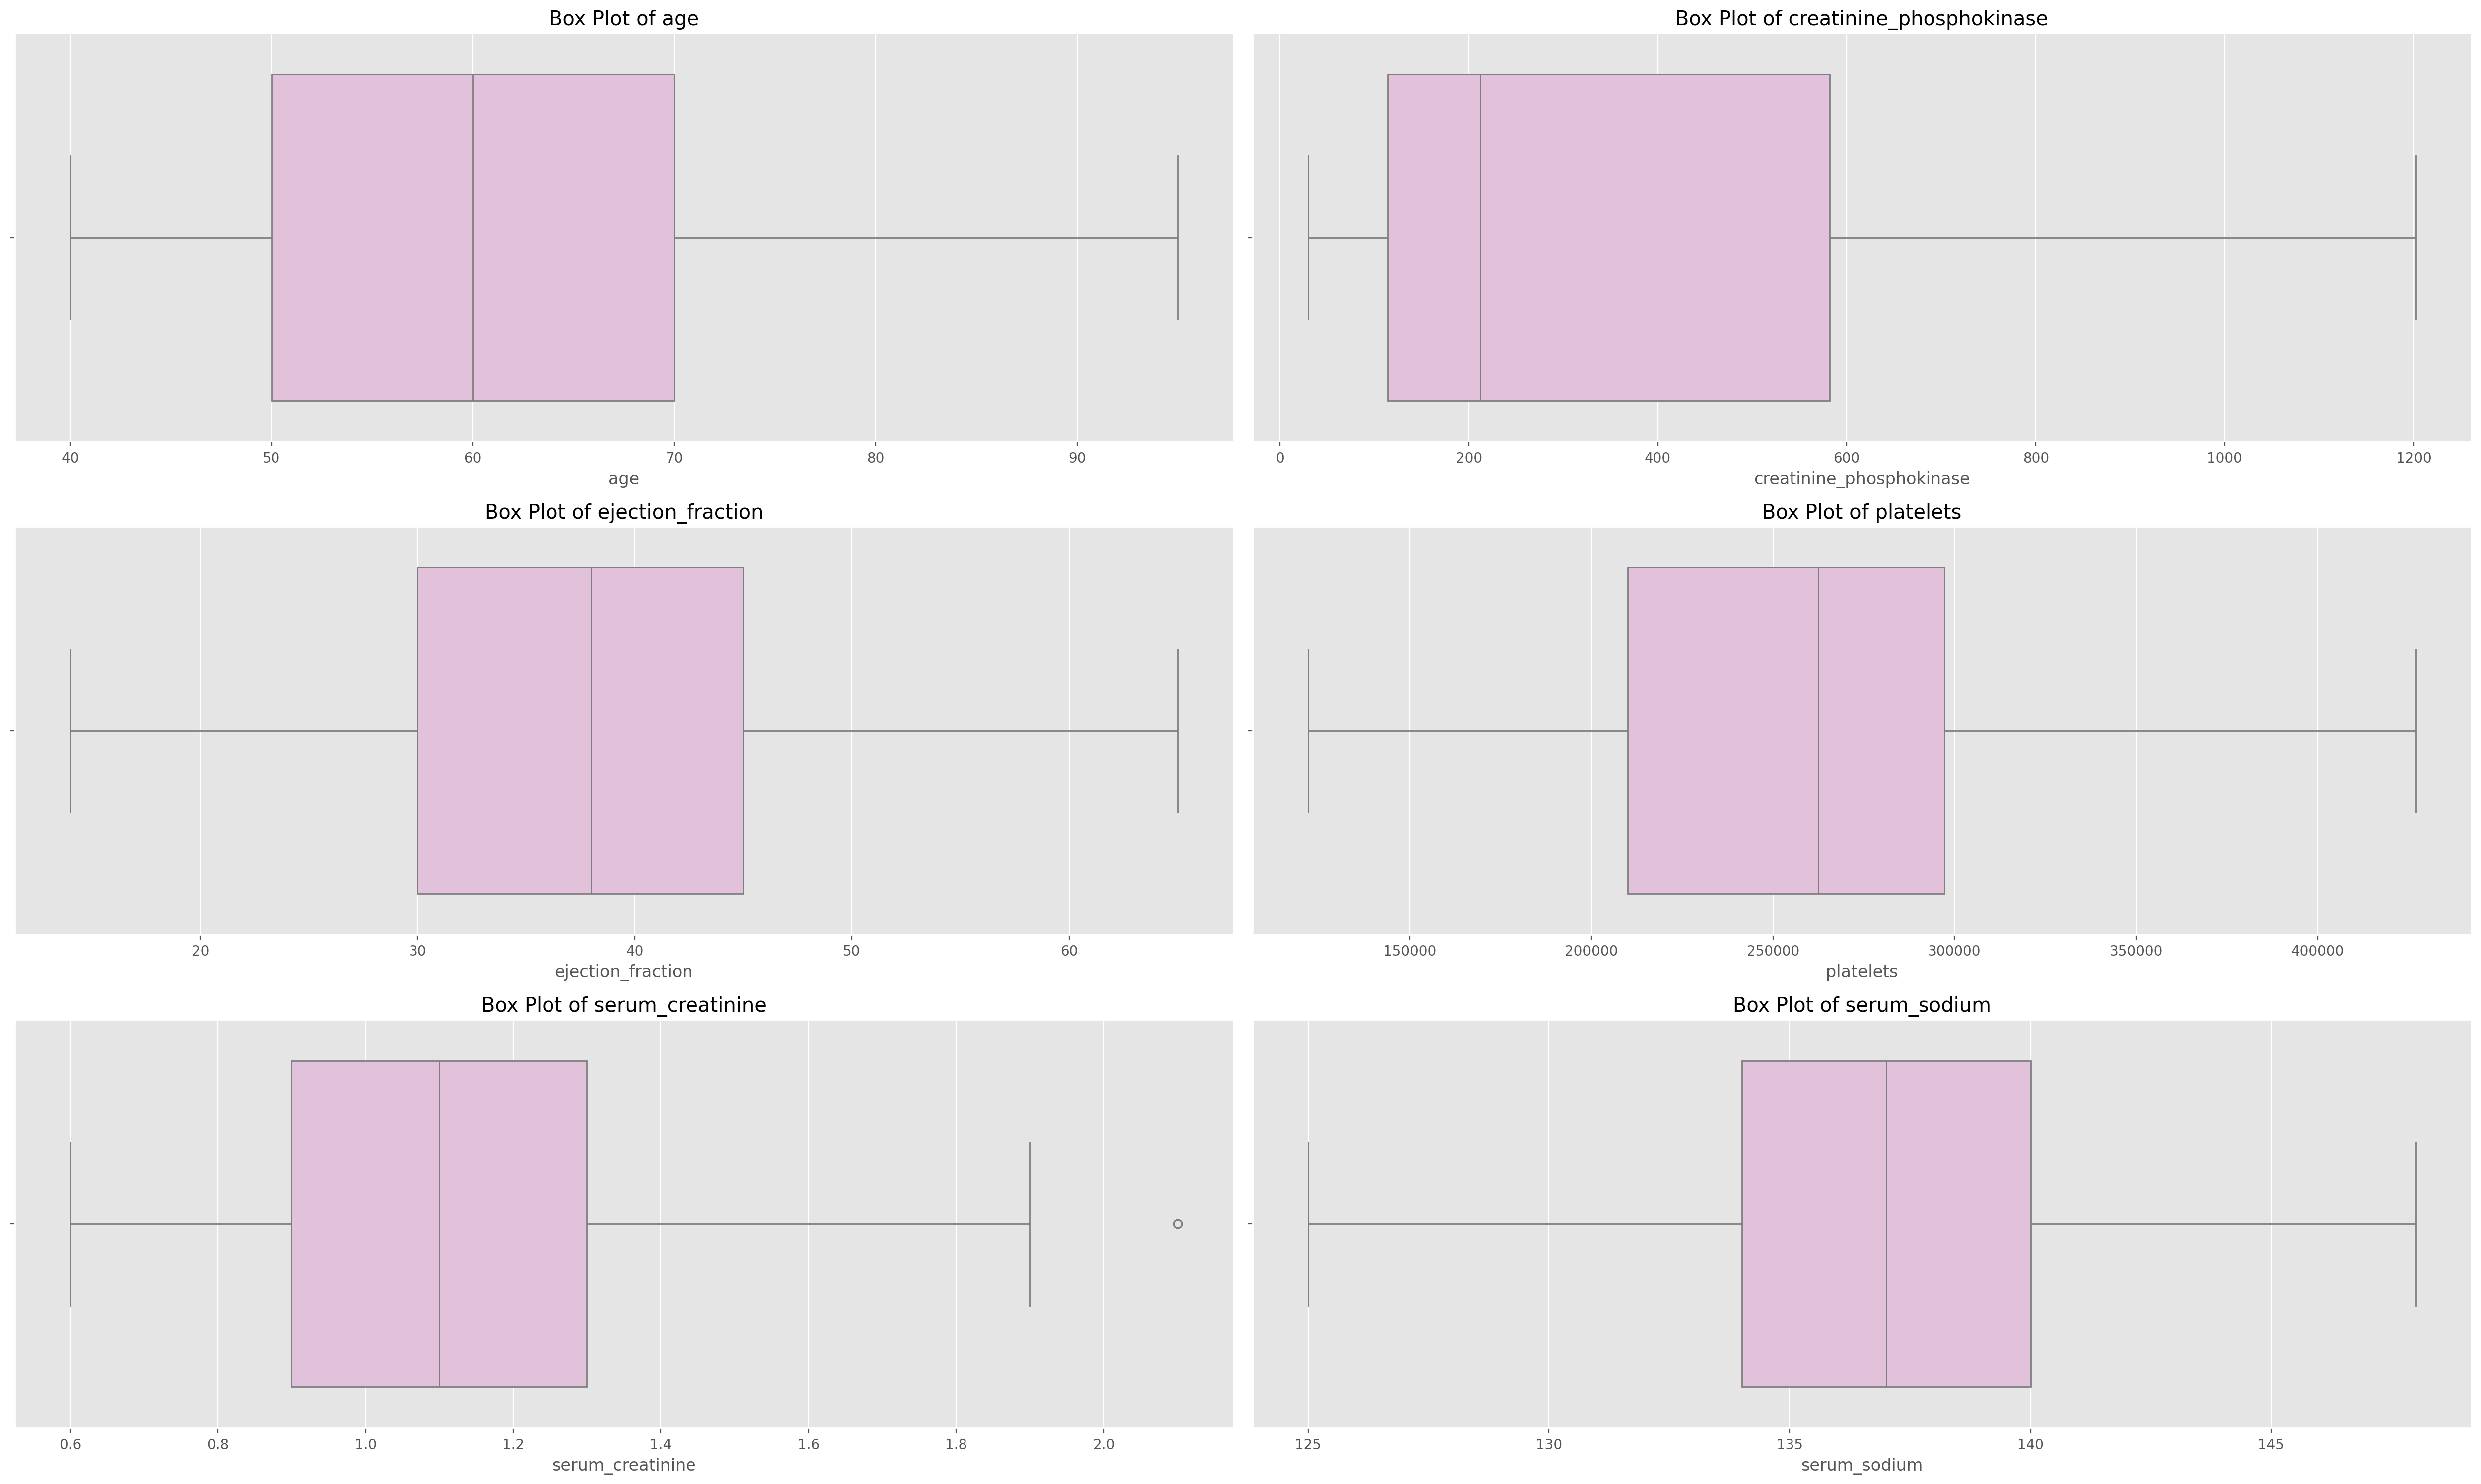

,outliers,percentage
serum_creatinine,3,1.339286
age,0,0.000000
creatinine_phosphokinase,0,0.000000
ejection_fraction,0,0.000000
platelets,0,0.000000
serum_sodium,0,0.000000
time,0,0.000000


In [12]:
# Create boxplots for numerical columns in the DataFrame df
create_boxplot(3, 2, df, num_cols, box_color="#E7BCDE")

# Display the number and percentage of outliers for each numerical column in the DataFrame df
show_outlier(df, num_cols)

# **Data Exploration**
Data Exploration is the process of analyzing and visualizing a dataset to gain insights and understand its characteristics.
<hr>

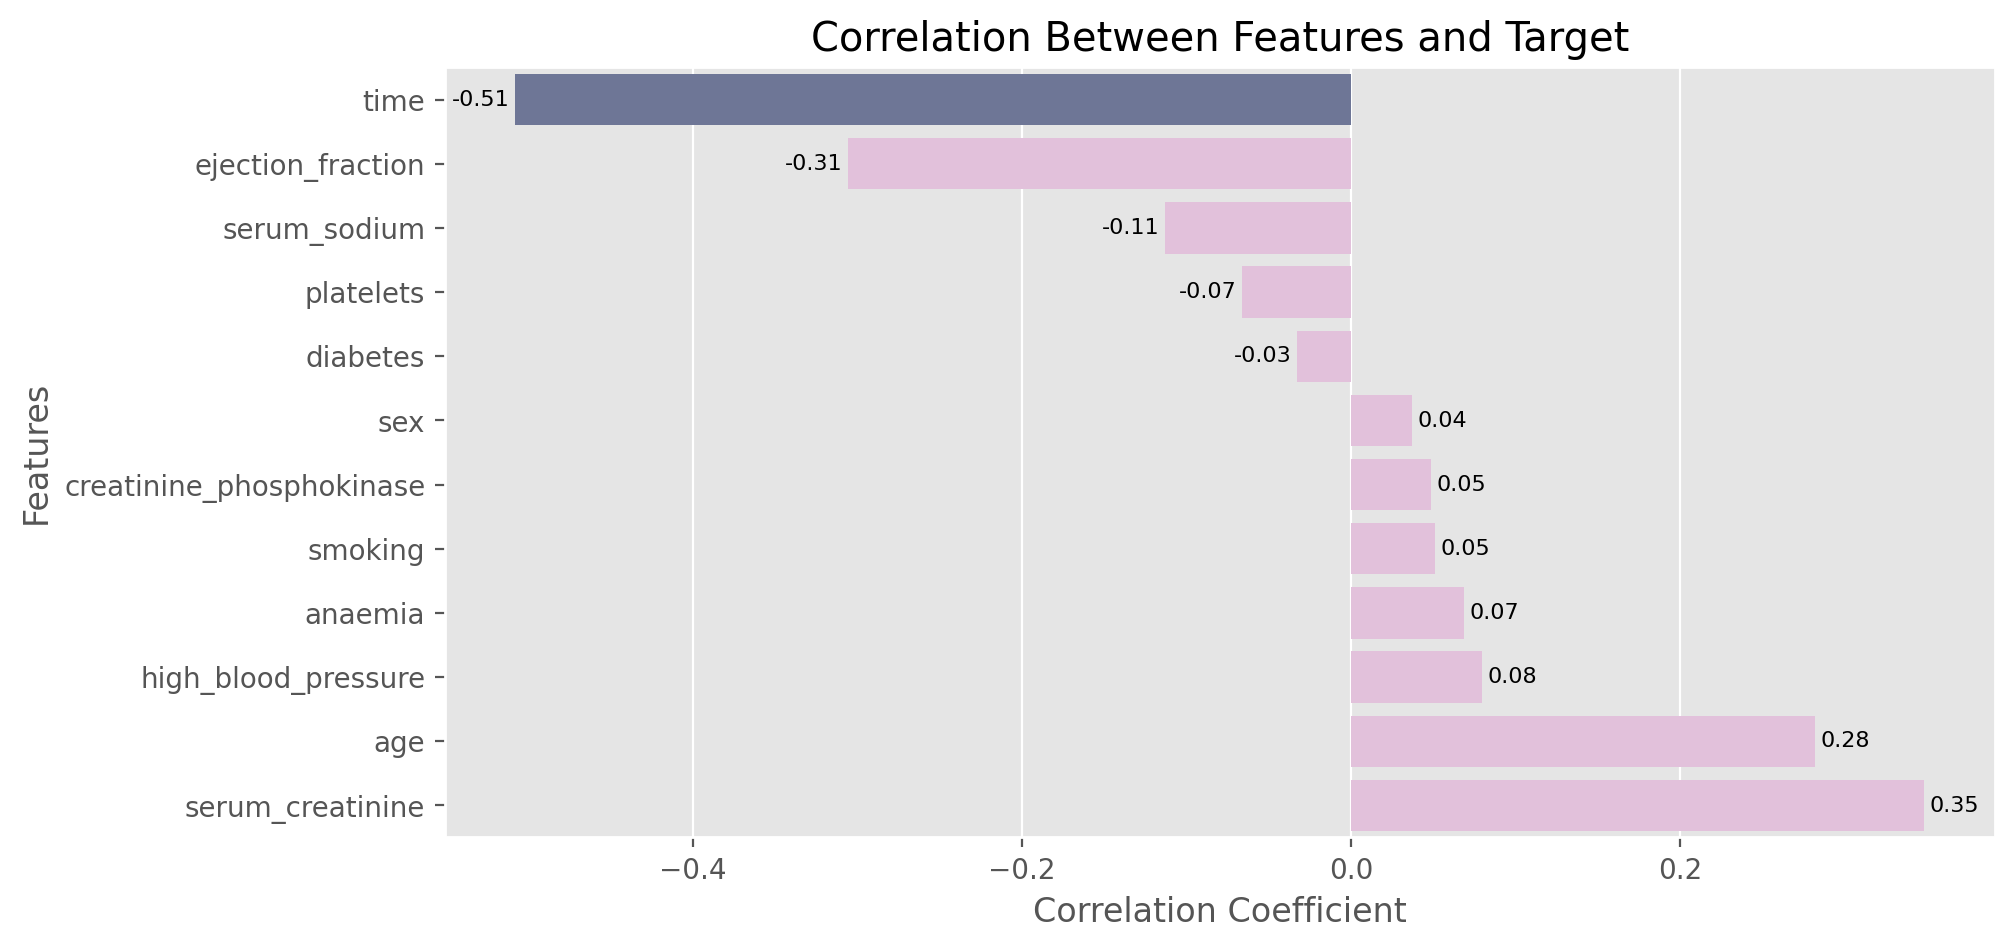

In [13]:
# Calculate the correlation between one-hot encoded features and the target column "death_event_Dead"
corr = pd.get_dummies(df).iloc[:, :-1].corr()[["death_event_Dead"]].iloc[:-1].sort_values("death_event_Dead")

# Choose a new color for the bars
new_bar_color = "#FF5733"  # You can replace this color code with the one you prefer

# Create a bar plot to visualize the correlation coefficients with the target column
plt.figure(figsize=(10, 5), dpi=200)
ax = sns.barplot(
    data=corr,
    x=corr.death_event_Dead,
    y=corr.index,
    # Assign a new color to all bars
    color=new_bar_color,
    # Add labels with correlation coefficients to the bars
    hue=corr.index,  # Assign 'y' variable to 'hue'
    palette=["#67729D" if i == np.max(abs(corr.death_event_Dead)) else "#E7BCDE" for i in abs(corr.death_event_Dead)],
    legend=False  # Set legend to False
)

# Add labels with correlation coefficients to the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", color="black", fontsize=8, padding=2)

# Set plot title and axis labels
plt.title("Correlation Between Features and Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")

# Display the plot
plt.show()

**Conclusion:**

The bar plot above illustrates the correlation coefficients between the one-hot encoded features and the target column "death_event_Dead." Each bar represents a feature, and its color indicates the strength and direction of correlation. The color palette is chosen to highlight the feature with the maximum absolute correlation.

- Features with bars in the lighter color have a positive correlation with the target.
- Features with bars in the darker color have a negative correlation with the target.
- The intensity of the color reflects the magnitude of the correlation coefficient.

This visualization provides insights into how each feature contributes to the prediction of the "death_event_Dead" target. Based on the picture above, it can be concluded that `time feature has a negative relationship with death event`, which means the longer the follow-up period is, the less likely the patient will die.

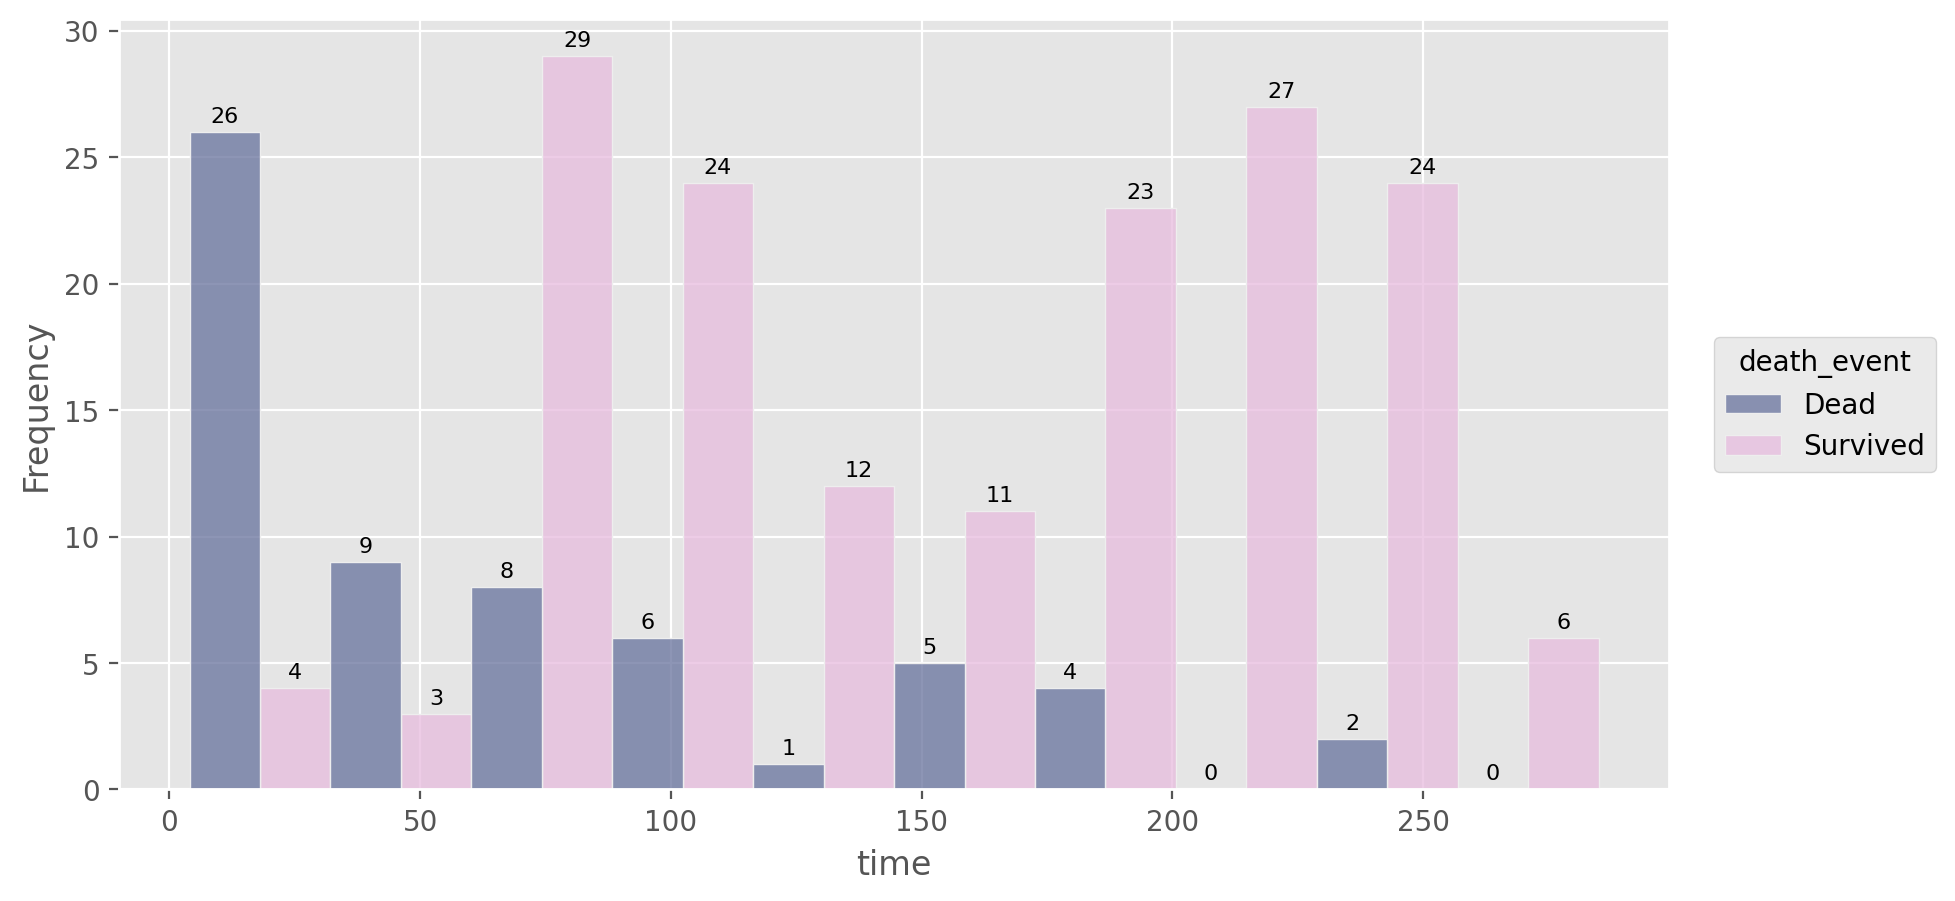

In [14]:
# Create a figure with a specified size and resolution
plt.figure(figsize=(10, 5), dpi=200)

# Create a histogram with multiple bars for the "time" variable, colored by "death_event"
# Set the color palette for the bars and specify dodge mode to separate bars for each category
ax = sns.histplot(df, x="time", hue="death_event", palette=["#67729D", "#E7BCDE"], multiple="dodge", bins=10)

# Add labels with counts to the bars in the histogram
for container in ax.containers:
    ax.bar_label(container, color="black", fontsize=8, padding=2)

# Move the legend to the center left outside the plot area
sns.move_legend(ax, loc="center left", bbox_to_anchor=(1.02, 0.5))

# Set the y-axis label
plt.ylabel("Frequency")

# Display the plot
plt.show()

**Conclusion:**

The histogram above depicts the distribution of the "time" variable colored by the "death_event" category. The plot aims to provide insights into how the time variable is related to the occurrence of the "death_event."

- The bars in color darker purple represent cases where "death_event" is not observed, while bars in color lighter purple represent cases where "death_event" is observed.
- The histogram suggests that there is a concentration of cases with longer "time" values for instances where "death_event" is observed.
- The legend on the right indicates the color-coding, making it clear which color corresponds to each category.
- The frequency of cases is labeled on top of each bar, providing a visual representation of the distribution.

This visualization aids in understanding the relationship between the "time" variable and the likelihood of observing the "death_event." Based on the plot above, it can be seen that the two features that have `the most influences after time, which are ejection_fraction and serum_creatinine`. `The higher the ejection_fraction is and the lower the serum_creatinine is, the more likely the patient will survive`. In order to simplify things, we'll separate ejection_fraction and serum_creatinine into 2 categories, which are greater than or equal to and less than the averages.

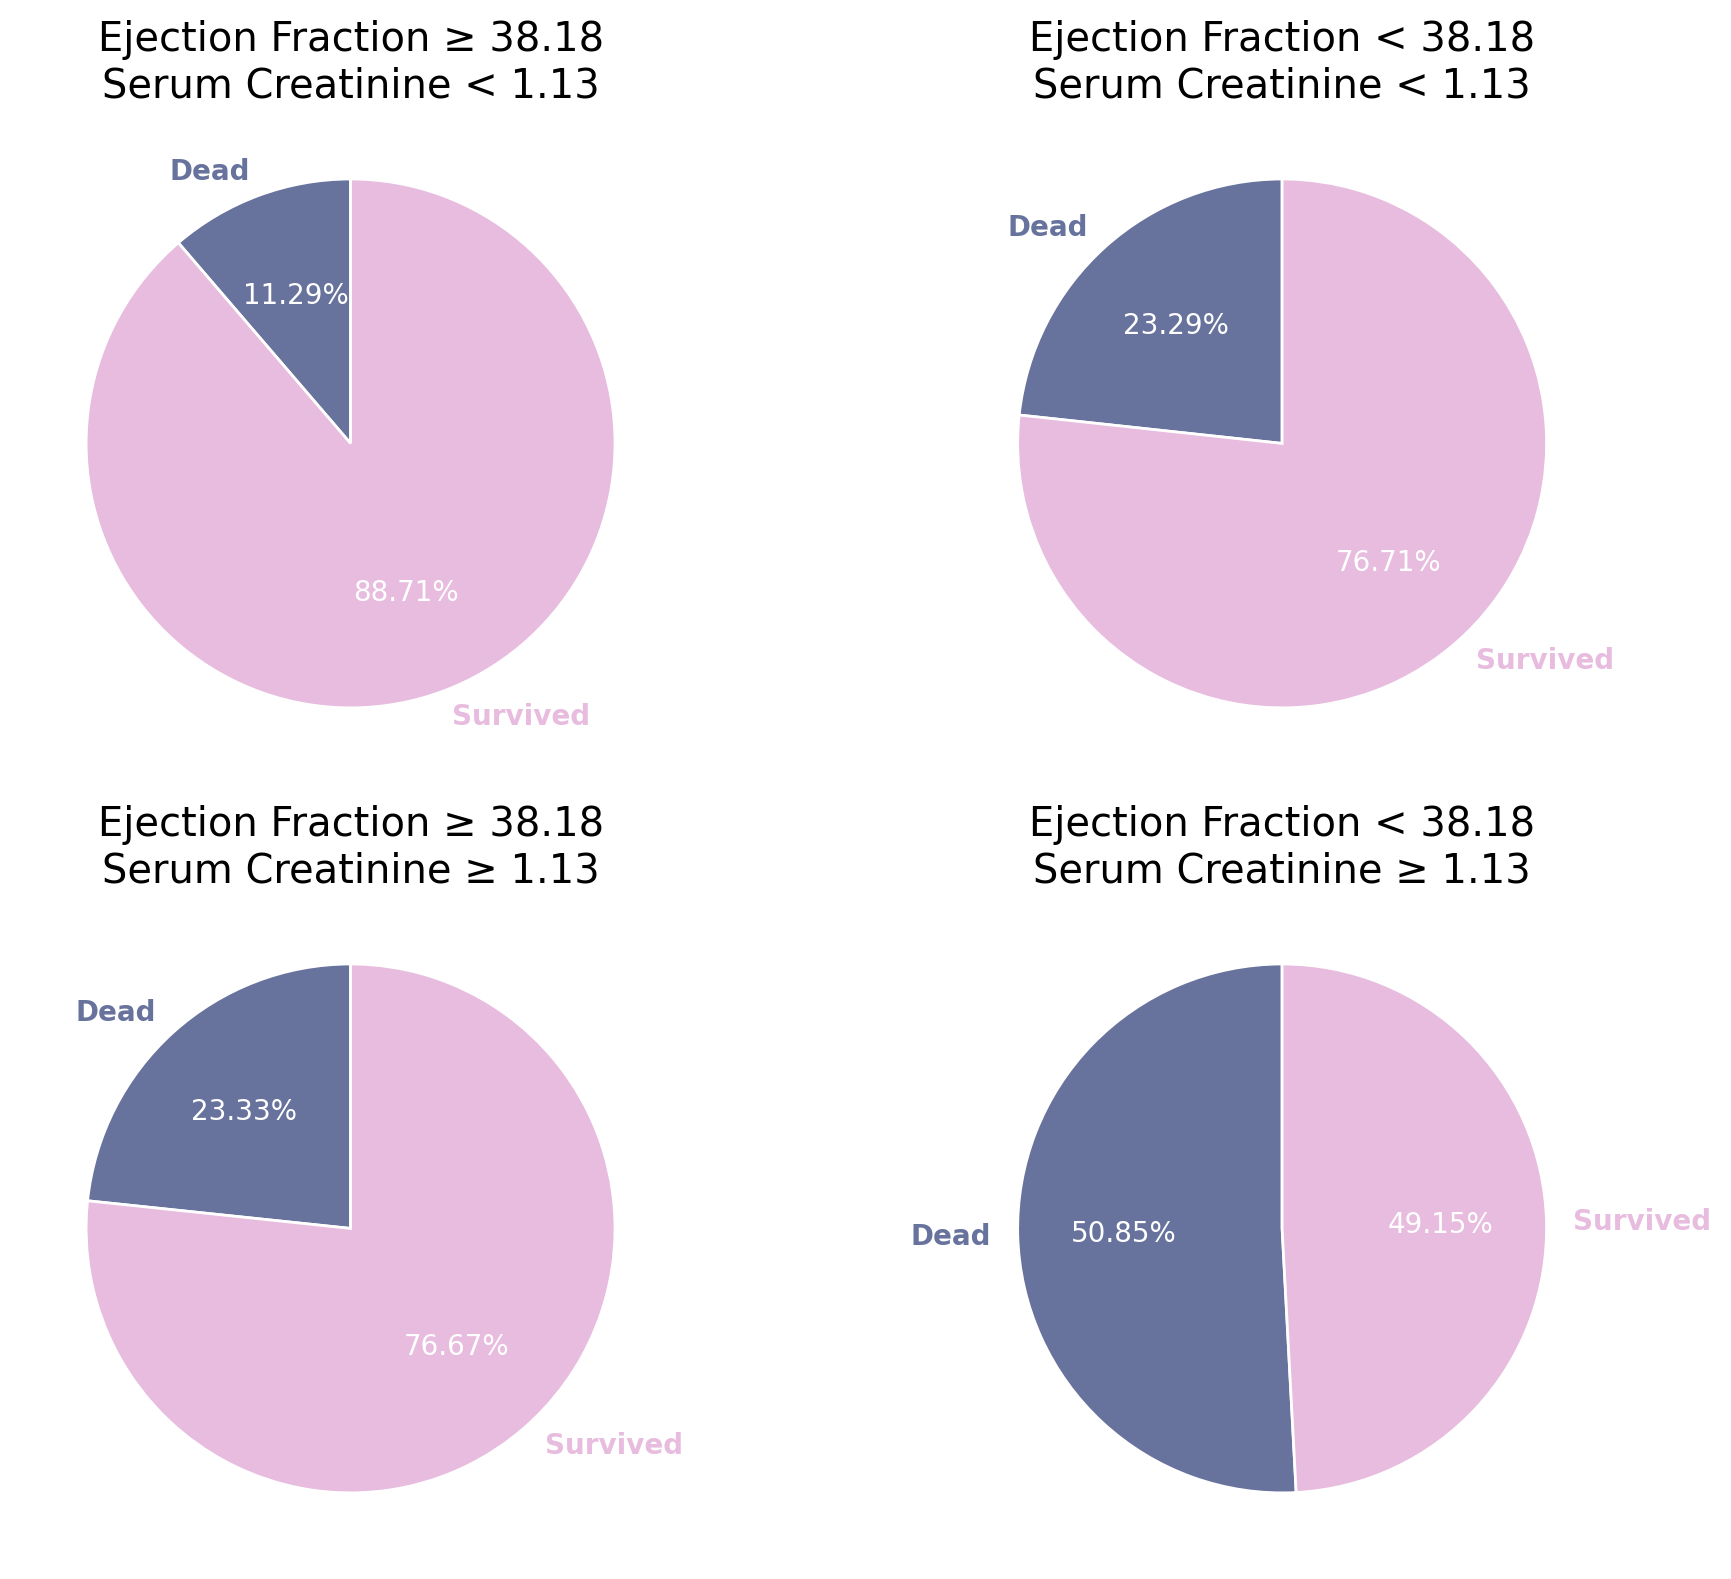

In [15]:
# Filter data for the first category based on conditions and group by "death_event"
first = df[
    (df["ejection_fraction"] >= np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] < np.mean(df["serum_creatinine"]))
].groupby("death_event").count()[["age"]]

# Filter data for the second category based on conditions and group by "death_event"
second = df[
    (df["ejection_fraction"] < np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] < np.mean(df["serum_creatinine"]))
].groupby("death_event").count()[["age"]]

# Filter data for the third category based on conditions and group by "death_event"
third = df[
    (df["ejection_fraction"] >= np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] >= np.mean(df["serum_creatinine"]))
].groupby("death_event").count()[["age"]]

# Filter data for the fourth category based on conditions and group by "death_event"
fourth = df[
    (df["ejection_fraction"] < np.mean(df["ejection_fraction"])) &
    (df["serum_creatinine"] >= np.mean(df["serum_creatinine"]))
].groupby("death_event").count()[["age"]]

# Combine the filtered data for each category into a list
ejection_fraction_and_serum_creatinine = [first, second, third, fourth]

# Titles for each subplot indicating the conditions used for filtering
titles = [
    f"Ejection Fraction ≥ {round(np.mean(df['ejection_fraction']),2)}\nSerum Creatinine < {round(np.mean(df['serum_creatinine']),2)}",
    f"Ejection Fraction < {round(np.mean(df['ejection_fraction']),2)}\nSerum Creatinine < {round(np.mean(df['serum_creatinine']),2)}",
    f"Ejection Fraction ≥ {round(np.mean(df['ejection_fraction']),2)}\nSerum Creatinine ≥ {round(np.mean(df['serum_creatinine']),2)}",
    f"Ejection Fraction < {round(np.mean(df['ejection_fraction']),2)}\nSerum Creatinine ≥ {round(np.mean(df['serum_creatinine']),2)}",
]

# Specify the number of rows and columns for the subplots
nrows, ncols = 2, 2

# Create a subplot grid
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 8), dpi=200, sharex=True, sharey=True)

# Counter to iterate through categories
n = 0

# Loop through each subplot and create a pie chart for each category
for nrow in range(nrows):
    for ncol in range(ncols):
        # Create a pie chart for the current category
        patches, texts, pcts = ax[nrow, ncol].pie(
            ejection_fraction_and_serum_creatinine[n].age,
            labels=ejection_fraction_and_serum_creatinine[n].index,
            startangle=90,
            colors=["#67729D", "#E7BCDE"],
            autopct="%.2f%%",
            wedgeprops={"linewidth": 1.0, "edgecolor": "white"}
        )

        # Set the title for the subplot based on the category
        ax[nrow, ncol].set_title(titles[n])

        # Increment the counter
        n += 1

        # Adjust label colors to match the corresponding pie slice
        for index, patch in enumerate(patches):
            texts[index].set_color(patch.get_facecolor())

        # Set properties for percentage labels
        plt.setp(pcts, color="white")
        plt.setp(texts, fontweight=600)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Conclusion:**

The pie charts above illustrate the distribution of death events within different categories based on conditions related to ejection fraction and serum creatinine levels. Each subplot represents a distinct category, and the pie chart slices depict the proportion of observed and unobserved death events within that category. `According to the American Heart Association`, a nonprofit organization in the U.S., a normal ejection_fraction is about 50% to 75% . `Out of all 224 patients (after removing outliers), only 20.98% of them that have normal ejection_fraction`.

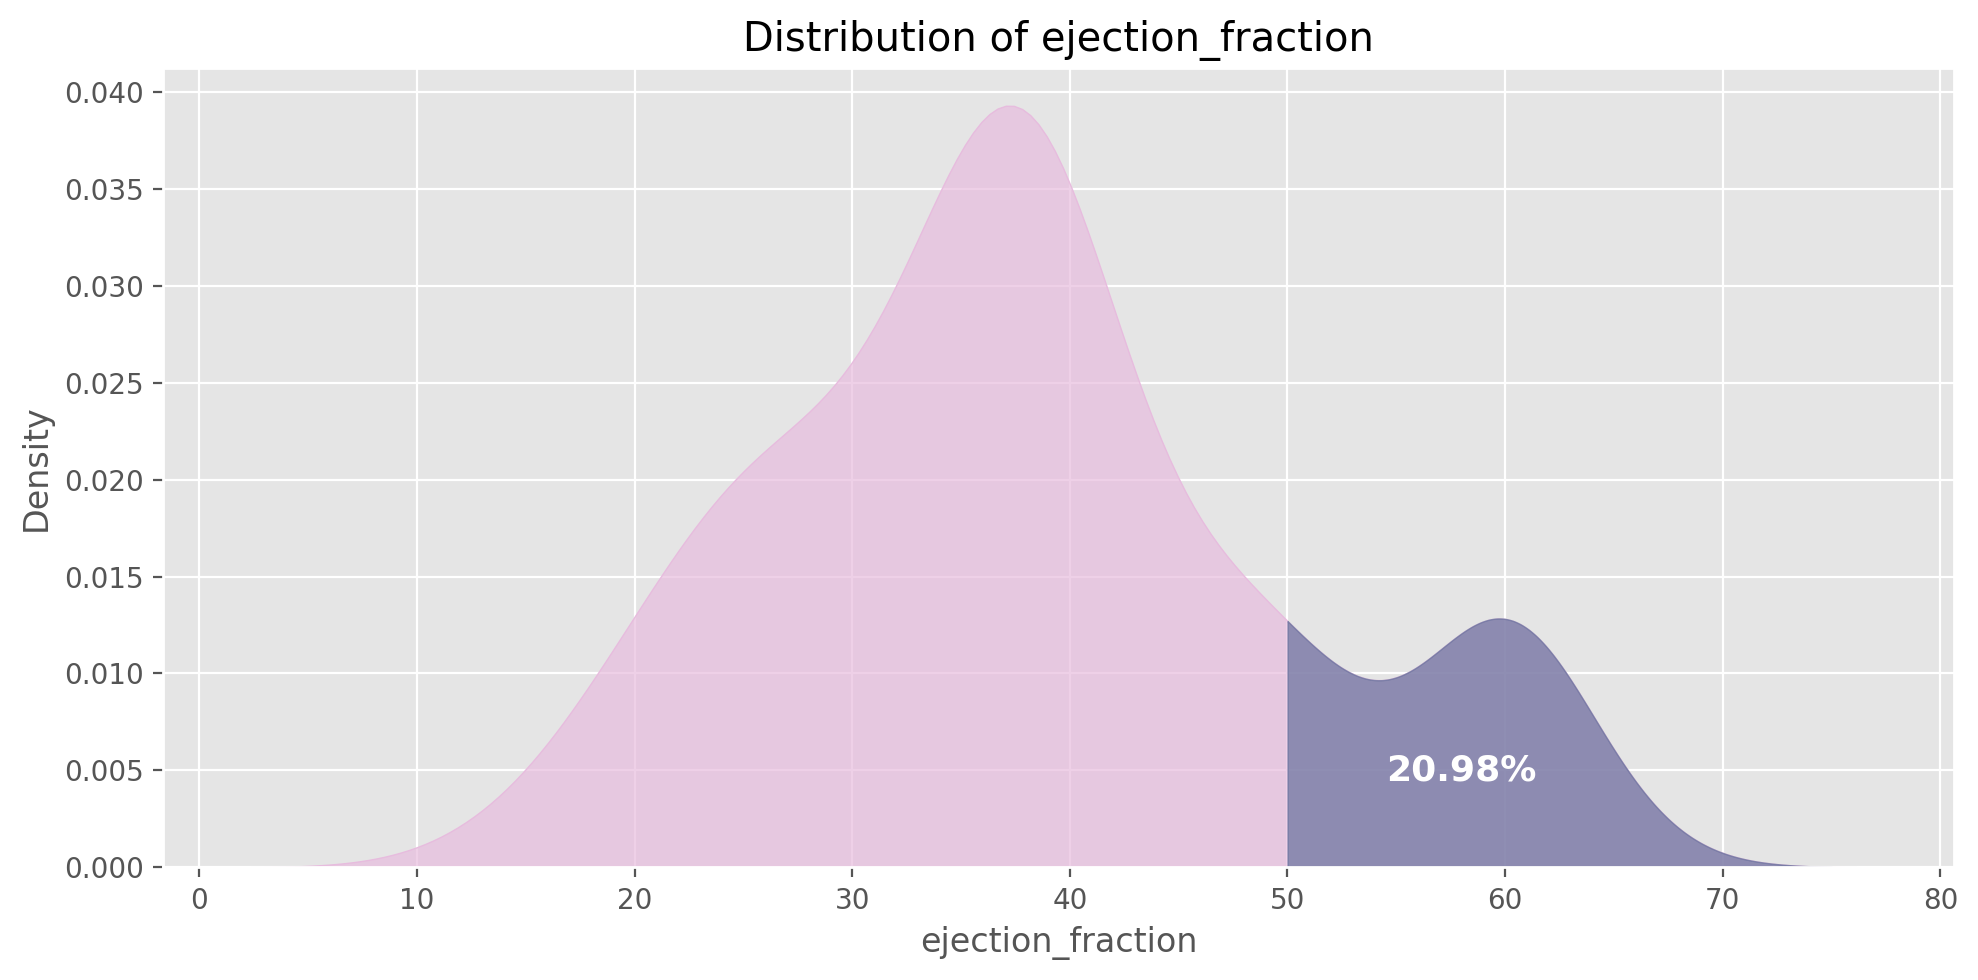

In [16]:
# Create a figure and axis for the plot with a specified size and resolution
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

# Create a kernel density estimate (KDE) plot for the "ejection_fraction" variable
kde_ejection_fraction = sns.kdeplot(ax=ax, data=df, x="ejection_fraction", color="#E7BCDE", fill=True, alpha=0.7)

# Get the x-axis limits of the KDE plot
xmin, xmax = kde_ejection_fraction.get_xlim()

# Create a Gaussian KDE for the "ejection_fraction" variable
kde = gaussian_kde(df["ejection_fraction"])
x = np.linspace(xmin, xmax, 10_000)
kde_y = kde(x)

# Extract a subset of the KDE within the range of 50 to 75
x0, y0 = [], []
for i, j in zip(x, kde_y):
    if (i >= 50) & (i <= 75):
        x0.append(i)
        y0.append(j)
x0, y0 = np.array(x0), np.array(y0)

# Calculate the area under the KDE curve within the specified range
area0 = round(simps(y0, x0, dx=1) * 100, 0)

# Fill the area under the KDE curve within the range of 50 to 75 with a different color
kde_ejection_fraction.fill_between(x=x0, y1=y0, color="#67729D", alpha=0.7)

# Set the title for the plot
ax.set_title("Distribution of ejection_fraction")

# Set the x-axis limits based on the KDE plot
ax.set_xlim(xmin, xmax)

# Add a text annotation to indicate the percentage of data within the range of 50 to 75
ax.text(
    x=58,
    y=0.0045,
    s=f"{round(len(df[(df['ejection_fraction'] >= 50) & (df['ejection_fraction'] <= 75)]) / len(df) * 100, 2)}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Conclusion:**

The KDE plot above visualizes the distribution of the "ejection_fraction" variable in the dataset. The shaded area under the curve represents the density of observations, with a specific focus on the range between 50 and 75.

- The majority of data points are concentrated within the central region of the plot, indicating a peak in density.
- The filled area between 50 and 75 on the x-axis represents a subset of the distribution, and its percentage is highlighted in the annotation. Approximately 20,98% of the data falls within this range.

This visualization provides insights into the overall distribution of ejection fraction values, emphasizing a specific range and its proportion within the dataset. `According to Mayo Clinic, a nonprofit American academic medical center,` the typical range for serum_creatinine for adult men is 0.74 to 1.35 mg/dL and for adult women is 0.59 to 1.04 mg/dL. `Around 68.75% of 144 male patients and 60% of 80 female patients have their serum_creatinine` within those ranges.

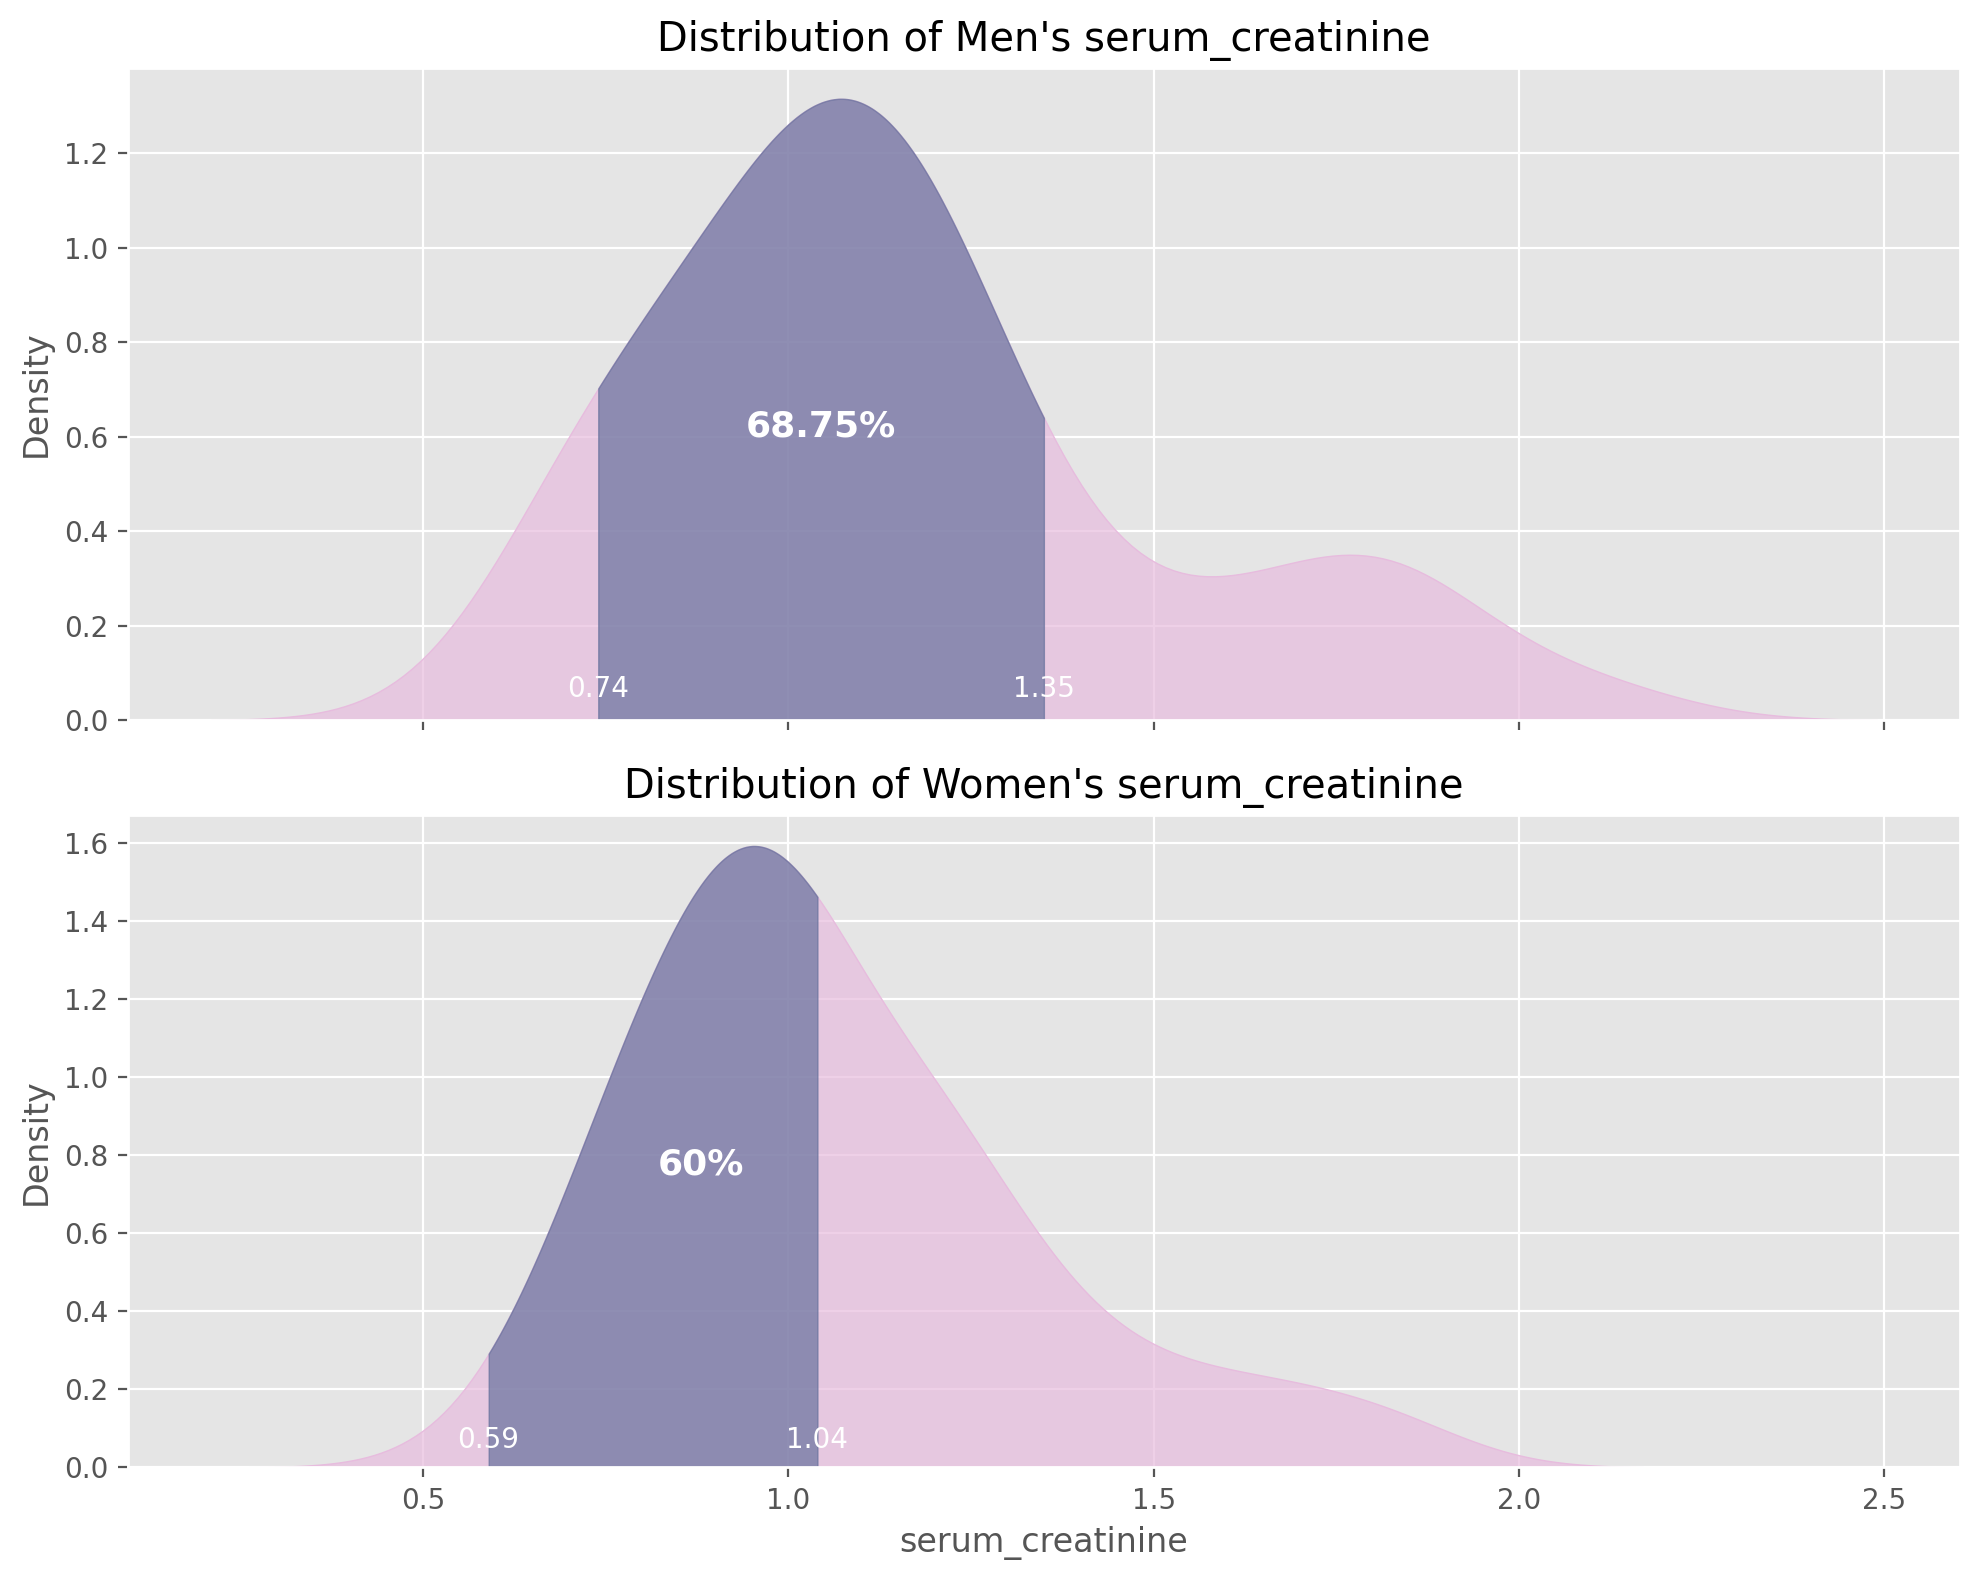

In [17]:
# Create a subplot grid with 2 rows and 1 column for the plot with a specified size and resolution
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=200, sharex=True)

# Loop through each row and create a KDE plot for serum_creatinine for Men and Women
for nrow, lower, upper, sex, title in zip(range(2), [0.74, 0.59], [1.35, 1.04], [1, 0], ["Men", "Women"]):
    # Create a KDE plot for serum_creatinine for the current gender
    kde_serum_creatinine = sns.kdeplot(ax=ax[nrow], data=df[df["sex"] == sex], x="serum_creatinine", color="#E7BCDE", fill=True, alpha=0.7)
    
    # Get the x-axis limits of the KDE plot
    xmin, xmax = kde_serum_creatinine.get_xlim()
    
    # Create a Gaussian KDE for serum_creatinine for the current gender
    kde = gaussian_kde(df[df["sex"] == sex]["serum_creatinine"])
    x = np.linspace(xmin, xmax, 10_000)
    kde_y = kde(x)

    # Extract a subset of the KDE within the specified range
    x0, y0 = [], []
    for i, j in zip(x, kde_y):
        if (i >= lower) & (i <= upper):
            x0.append(i)
            y0.append(j)
    x0, y0 = np.array(x0), np.array(y0)

    # Calculate the area under the KDE curve within the specified range
    area0 = round(simps(y0, x0, dx=1) * 100, 0)
    
    # Fill the area under the KDE curve within the specified range with a different color
    kde_serum_creatinine.fill_between(x=x0, y1=y0, color="#67729D", alpha=0.7)

    # Set the title for the subplot
    ax[nrow].set_title(f"Distribution of {title}'s serum_creatinine")

    # Add text annotations for lower and upper values on the plot
    for tick in [lower, upper]:
        ax[nrow].text(x=tick, y=0.05, s=tick, horizontalalignment="center", color="white", fontweight=500)

# Add text annotations for the percentage of data within the specified range for Men and Women
ax[0].text(
    x=0.74 + ((1.35 - 0.74) / 2),
    y=0.6,
    s=f"{len(df[(df['sex'] == 1) & (df['serum_creatinine'] >= 0.74) & (df['serum_creatinine'] <= 1.35)]) / len(df[df['sex'] == 1]) * 100}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

ax[1].text(
    x=0.88,
    y=0.75,
    s=f"{int(len(df[(df['sex'] == 0) & (df['serum_creatinine'] >= 0.59) & (df['serum_creatinine'] <= 1.04)]) / len(df[df['sex'] == 0]) * 100)}%",
    horizontalalignment="center",
    color="white",
    fontweight="bold",
    fontsize=13
)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Conclusion:**

The subplot grid above illustrates the distribution of serum creatinine levels for Men and Women. Each subplot represents the KDE plot for the respective gender, emphasizing a specific range of serum creatinine values.

Conclusions:
- For Men, the shaded area under the KDE curve highlights the subset of serum creatinine values between 0.74 and 1.35. Approximately 68,75% of Men's data falls within this range.
- For Women, the filled area between 0.59 and 1.04 on the x-axis represents a specific subset of serum creatinine distribution, with approximately 60% of Women's data within this interval.

These visualizations provide insights into the gender-specific distributions of serum creatinine, focusing on particular ranges and the percentage of data within those ranges for Men and Women.

# **Data Preprocessing**
Data preprocessing refers to the initial steps taken to clean, transform, and organize raw data before it can be effectively utilized for analysis or machine learning.
<hr>

In [18]:
# Create feature matrix X by dropping the "death_event" column from the DataFrame
X = df.drop("death_event", axis=1)

# Create target variable y by selecting the "death_event" column from the DataFrame
y = df["death_event"]

Split the dataset into 80% training data and 20% testing data. *random_state* ensures that we have the same train-test split every time. The seed number for *random_state* doesn't have to be 62 as it can be any number.

In [19]:
# Set a fixed random state for reproducibility
random_state = 62

# Split the dataset into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Print the size of the training dataset and its percentage relative to the entire dataset
print(f"Training dataset\t: {len(X_train)}\t({round(len(X_train) / len(X) * 100)}%)")

# Print the size of the testing dataset and its percentage relative to the entire dataset
print(f"Testing dataset\t\t: {len(X_test)}\t({round(len(X_test) / len(X) * 100)}%)")

Training dataset	: 179	(80%)
Testing dataset		: 45	(20%)


Since we have an imbalanced dataset, we can handle that problem by oversampling the minority class or undersampling the majority class. Many researchers also suggest combining oversampling and undersampling methods to balance the dataset better. We'll compare the following methods with the baseline Random Forest and Gradient Boosting models results:
- Random Oversampling
- SMOTE Oversampling
- Random Undersampling
- NearMiss Undersampling
- SMOTE + Tomek Links
- SMOTE + Edited Nearest Neighbor

It's important to note that we apply the resampling methods to the training dataset only while the testing dataset needs to keep untouched.

In [20]:
# Random Oversampling
ros = RandomOverSampler(random_state=random_state)
X_train_ros,y_train_ros = ros.fit_resample(X_train,y_train)

# SMOTE Oversampling
smote = SMOTE(random_state=random_state)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

# Random Undersampling
rus = RandomUnderSampler(random_state=random_state)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)

# NearMiss Undersampling
nearmiss = NearMiss(version=3)
X_train_nearmiss,y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)

# SMOTE + Tomek Links
smotetomek = SMOTETomek(random_state=random_state)
X_train_smotetomek,y_train_smotetomek = smotetomek.fit_resample(X_train,y_train)

# SMOTE + Edited Nearest Neighbors
smoteenn = SMOTEENN(random_state=random_state)
X_train_smoteenn,y_train_smoteenn = smoteenn.fit_resample(X_train,y_train)

Take two random numerical features to visualize our dataset using a scatter plot. We can see that majority of the dataset belongs to class Survived and a small portion of the dataset belongs to class Dead.

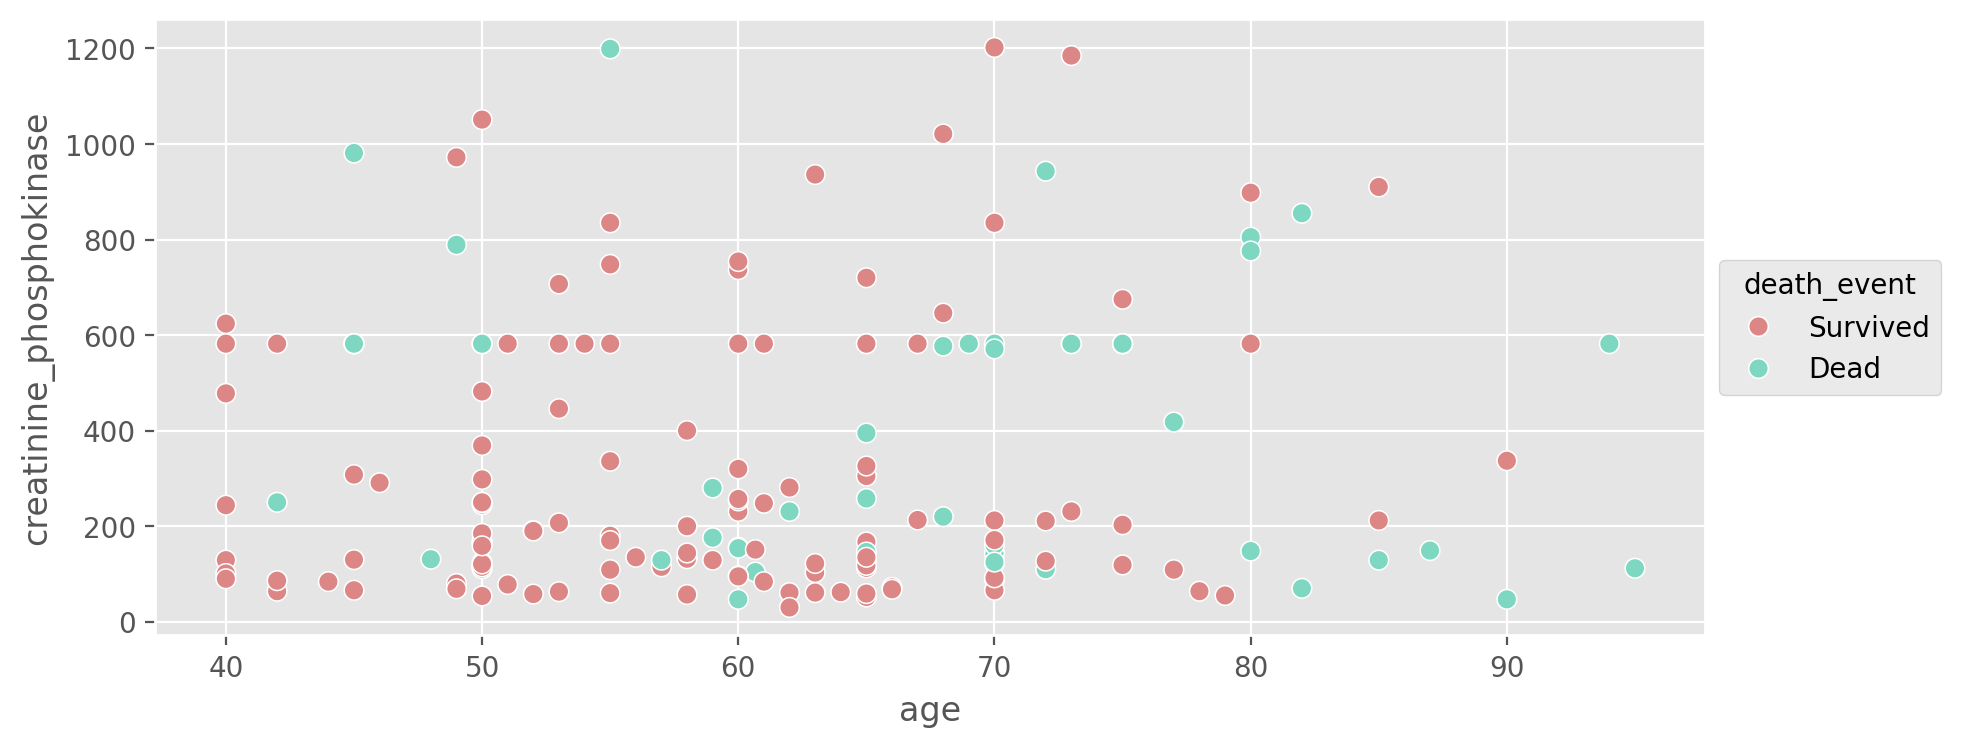

In [21]:
# Set the size and resolution of the figure for the scatter plot
plt.figure(figsize=(10, 4), dpi=200)

# Create a scatter plot using seaborn with age on the x-axis, creatinine_phosphokinase on the y-axis, and color-coded by death_event
ax = sns.scatterplot(
    data=pd.concat([X_train, y_train], axis=1),  # Combine X_train and y_train into a single DataFrame
    x="age",  # Set the x-axis to the "age" feature
    y="creatinine_phosphokinase",  # Set the y-axis to the "creatinine_phosphokinase" feature
    hue="death_event",  # Color the points based on the "death_event" target variable
    palette=["#DC8686", "#7ED7C1"],  # Set custom colors for the two classes
    s=50  # Set the size of the markers in the scatter plot
)

# Place the legend outside the plot to the right, centered vertically, with a title for the "death_event" classes
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", title="death_event")

# Display the plot
plt.show()

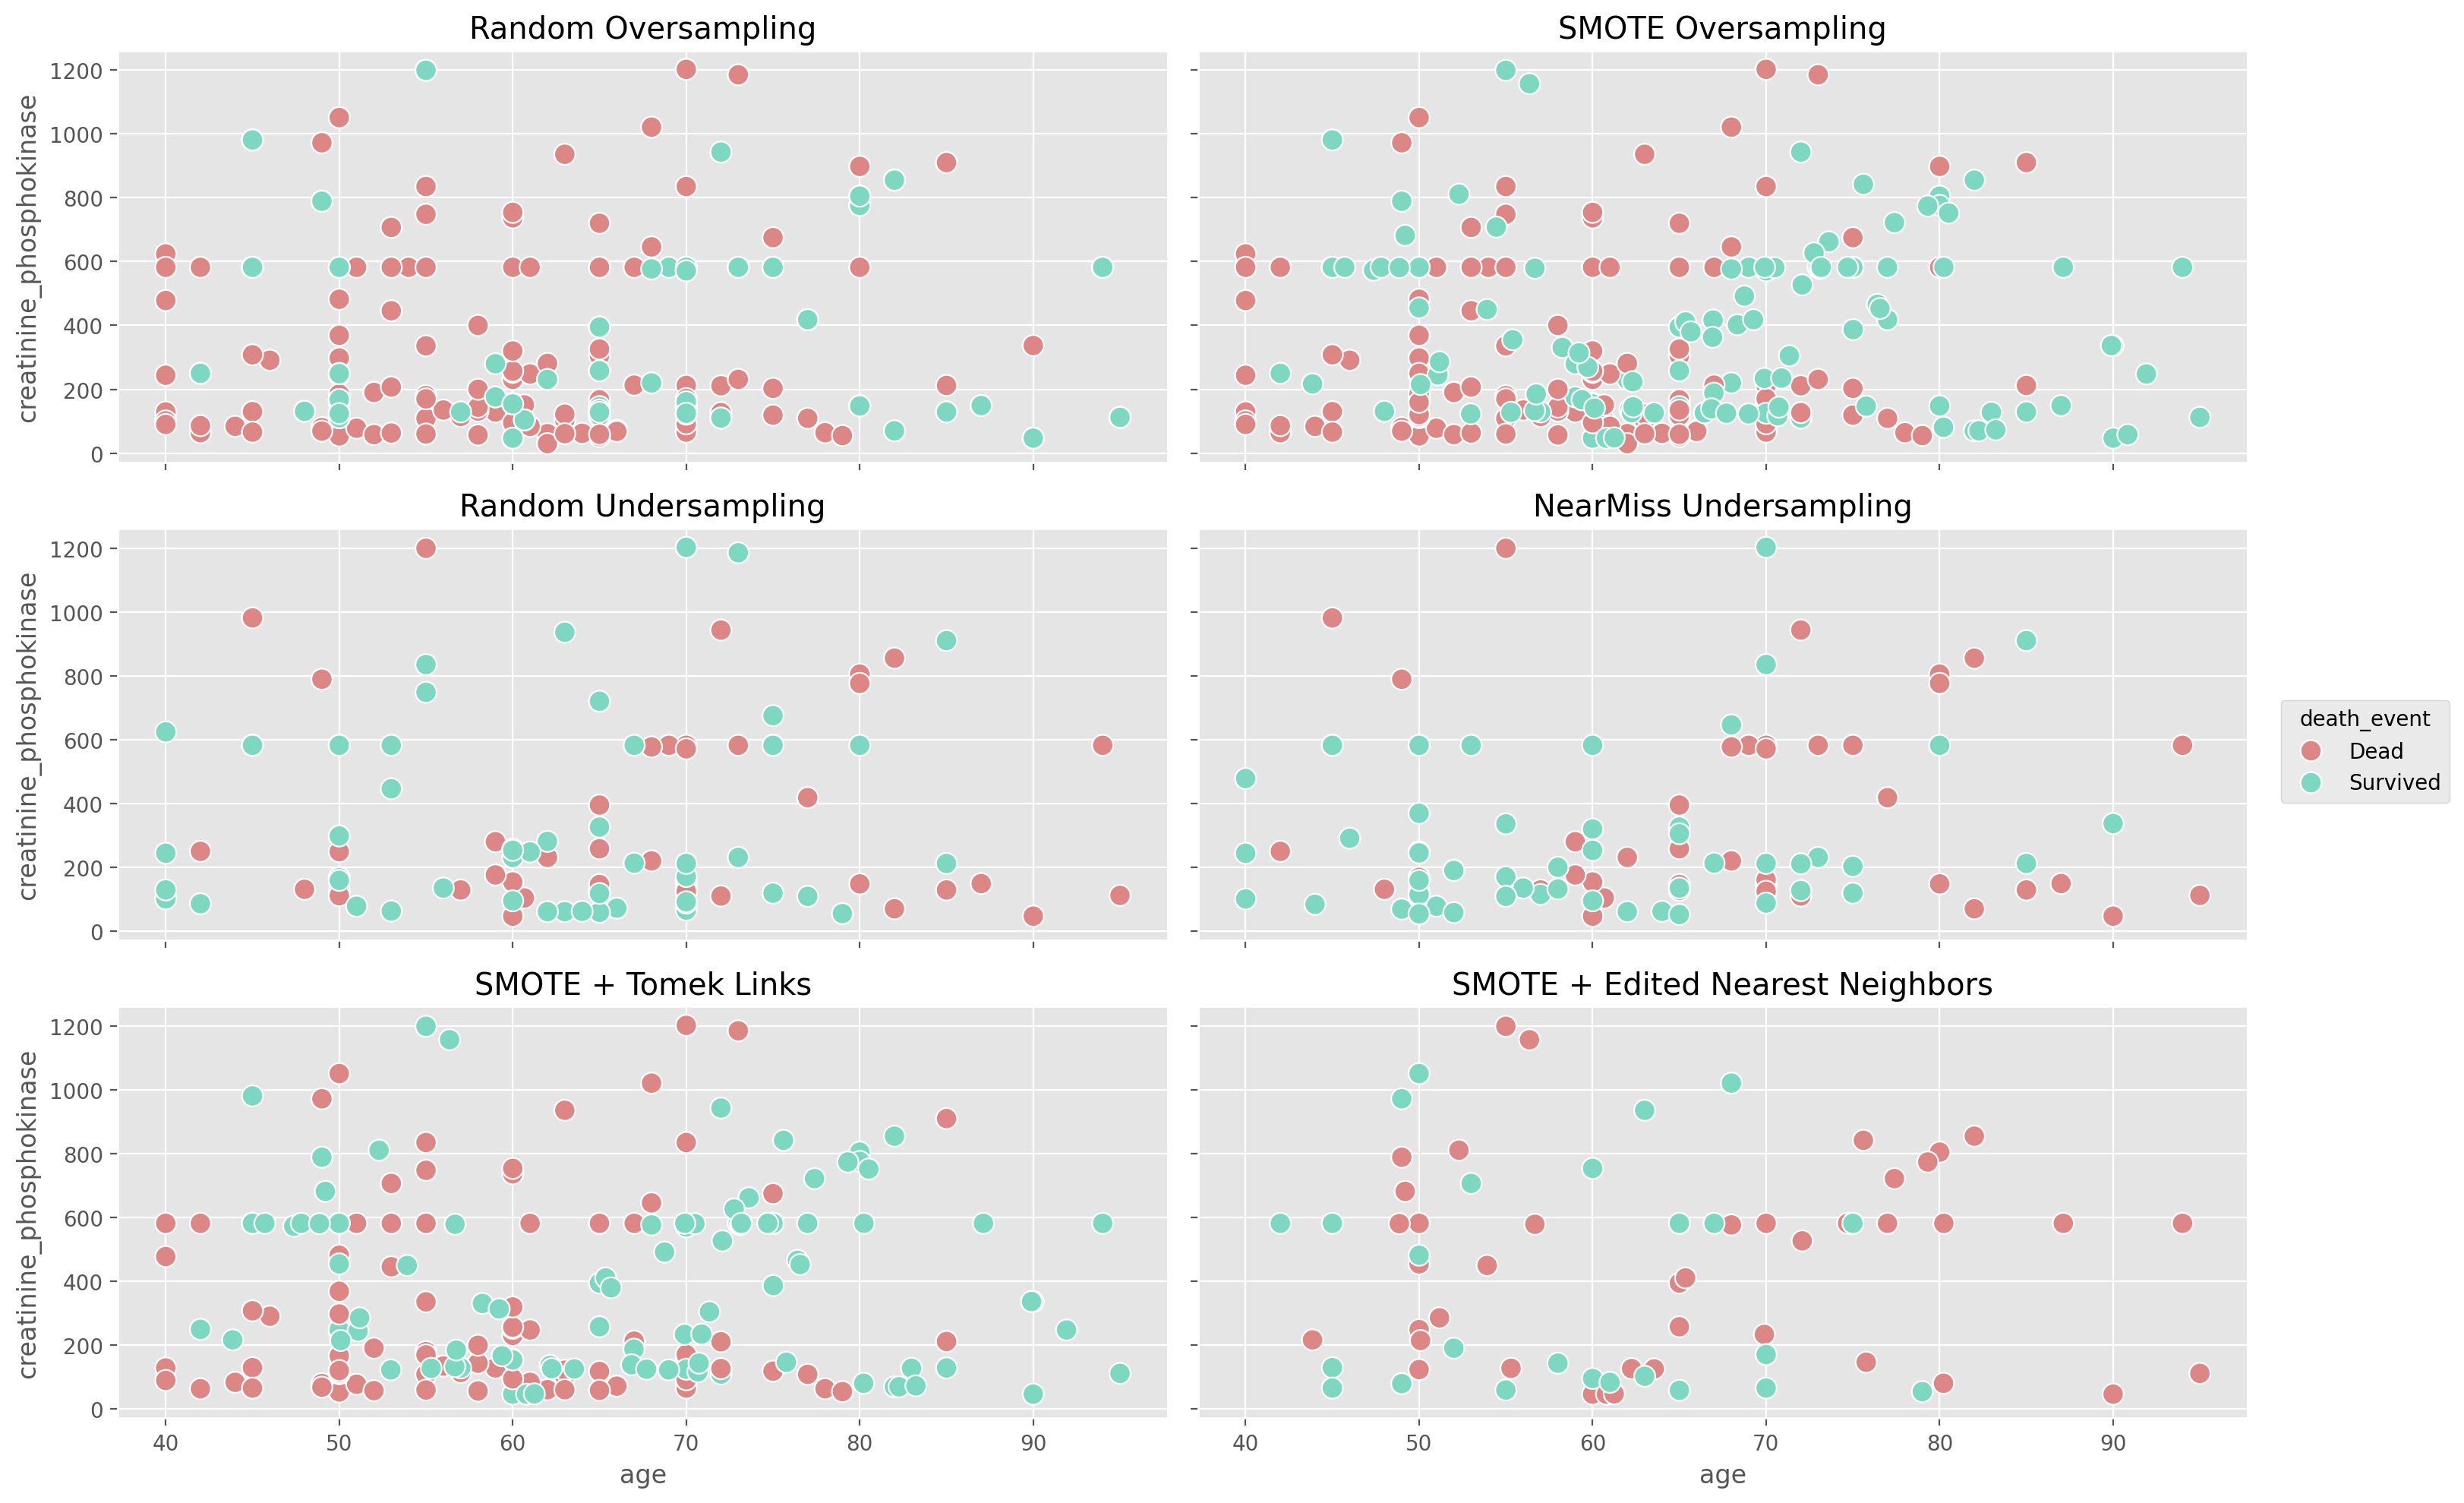

In [22]:
# Lists of different training sets and corresponding target sets for different sampling techniques
X_trains = [X_train_ros, X_train_smote, X_train_rus, X_train_nearmiss, X_train_smotetomek, X_train_smoteenn]
y_trains = [y_train_ros, y_train_smote, y_train_rus, y_train_nearmiss, y_train_smotetomek, y_train_smoteenn]

# Titles for each subplot representing different sampling techniques
titles = [
    "Random Oversampling", "SMOTE Oversampling", "Random Undersampling",
    "NearMiss Undersampling", "SMOTE + Tomek Links", "SMOTE + Edited Nearest Neighbors"
]

# Number of rows and columns for the subplots
nrows, ncols = 3, 2

# Create a subplot grid with specified size and sharing axes
fig, ax = plt.subplots(nrows, ncols, figsize=(15, 10), dpi=200, sharex=True, sharey=True)

# Counter for iterating through different sampling techniques
n = 0

# Iterate through subplot grid
for nrow in range(nrows):
    for ncol in range(ncols):
        # Create a scatter plot for each sampling technique
        sns.scatterplot(
            data=pd.concat([X_trains[n], y_trains[n]], axis=1),
            x="age",
            y="creatinine_phosphokinase",
            hue="death_event",
            palette=["#DC8686", "#7ED7C1"],
            s=100,
            ax=ax[nrow, ncol]
        )
        ax[nrow, ncol].set_title(titles[n])
        ax[nrow, ncol].legend([], [], frameon=False)  # Hide individual legends for each subplot
        n += 1

# Get legend handles and labels from the last subplot and create a common legend
handles, labels = ax[nrow, ncol].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc="center left", title="death_event")

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

Due to our features have different scales, we can standardize them.

In [23]:
scaler = StandardScaler()

# Base
scaled_X_train = scaler.fit_transform(X_train)

# Random Oversampling
scaled_X_train_ros = scaler.fit_transform(X_train_ros)

# SMOTE Oversampling
scaled_X_train_smote = scaler.fit_transform(X_train_smote)

# Random Undersampling
scaled_X_train_rus = scaler.fit_transform(X_train_rus)

# NearMiss Undersampling
scaled_X_train_nearmiss = scaler.fit_transform(X_train_nearmiss)

# SMOTE + Tomek Links
scaled_X_train_smotetomek = scaler.fit_transform(X_train_smotetomek)

# SMOTE + Edited Nearest Neighbors
scaled_X_train_smoteenn = scaler.fit_transform(X_train_smoteenn)

scaled_X_test = scaler.transform(X_test)

# **Model Definition and Training**
Model training is a crucial step in machine learning where the model learns from the data. 
<hr>

Create models without resampling methods as baselines to compare the models performance. Random Forest and Gradient Boosting models are used for this dataset. Note that there are two baseline Random Forest models (with and without the class_weight parameter) while there's only one baseline Gradient Boosting model since it doesn't have the class_weight parameter. Next, we're going to create other Random Forest and Gradient Boosting models with different resampling methods.

In [24]:
# Base
# Initialize and train a RandomForestClassifier on the base training set
rf_model_base = RandomForestClassifier(random_state=random_state)
rf_model_base.fit(scaled_X_train, y_train)

# Base (class_weight = "balanced")
# Initialize and train a RandomForestClassifier on the base training set with balanced class weights
rf_model_base_balanced = RandomForestClassifier(random_state=random_state, class_weight="balanced")
rf_model_base_balanced.fit(scaled_X_train, y_train)

# Random Oversampling
# Initialize and train a RandomForestClassifier on the Random Oversampling training set
rf_model_ros = RandomForestClassifier(random_state=random_state)
rf_model_ros.fit(scaled_X_train_ros, y_train_ros)

# SMOTE Oversampling
# Initialize and train a RandomForestClassifier on the SMOTE Oversampling training set
rf_model_smote = RandomForestClassifier(random_state=random_state)
rf_model_smote.fit(scaled_X_train_smote, y_train_smote)

# Random Undersampling
# Initialize and train a RandomForestClassifier on the Random Undersampling training set
rf_model_rus = RandomForestClassifier(random_state=random_state)
rf_model_rus.fit(scaled_X_train_rus, y_train_rus)

# NearMiss Undersampling
# Initialize and train a RandomForestClassifier on the NearMiss Undersampling training set
rf_model_nearmiss = RandomForestClassifier(random_state=random_state)
rf_model_nearmiss.fit(scaled_X_train_nearmiss, y_train_nearmiss)

# SMOTE + Tomek Links
# Initialize and train a RandomForestClassifier on the SMOTE + Tomek Links training set
rf_model_smotetomek = RandomForestClassifier(random_state=random_state)
rf_model_smotetomek.fit(scaled_X_train_smotetomek, y_train_smotetomek)

# SMOTE + Edited Nearest Neighbors
# Initialize and train a RandomForestClassifier on the SMOTE + Edited Nearest Neighbors training set
rf_model_smoteenn = RandomForestClassifier(random_state=random_state)
rf_model_smoteenn.fit(scaled_X_train_smoteenn, y_train_smoteenn)

RandomForestClassifier(random_state=62)

In [25]:
# Base
# Initialize the base Gradient Boosting model with a random seed
gb_model_base = GradientBoostingClassifier(random_state=random_state)
# Train the base model on the scaled training data and corresponding labels
gb_model_base.fit(scaled_X_train, y_train)

# Random Oversampling
# Initialize the Gradient Boosting model for Random Oversampling with a random seed
gb_model_ros = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled Random Oversampled training data and corresponding labels
gb_model_ros.fit(scaled_X_train_ros, y_train_ros)

# SMOTE Oversampling
# Initialize the Gradient Boosting model for SMOTE Oversampling with a random seed
gb_model_smote = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled SMOTE Oversampled training data and corresponding labels
gb_model_smote.fit(scaled_X_train_smote, y_train_smote)

# Random Undersampling
# Initialize the Gradient Boosting model for Random Undersampling with a random seed
gb_model_rus = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled Random Undersampled training data and corresponding labels
gb_model_rus.fit(scaled_X_train_rus, y_train_rus)

# NearMiss Undersampling
# Initialize the Gradient Boosting model for NearMiss Undersampling with a random seed
gb_model_nearmiss = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled NearMiss Undersampled training data and corresponding labels
gb_model_nearmiss.fit(scaled_X_train_nearmiss, y_train_nearmiss)

# SMOTE + Tomek Links
# Initialize the Gradient Boosting model for SMOTE + Tomek Links with a random seed
gb_model_smotetomek = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled SMOTE + Tomek Links training data and corresponding labels
gb_model_smotetomek.fit(scaled_X_train_smotetomek, y_train_smotetomek)

# SMOTE + Edited Nearest Neighbors
# Initialize the Gradient Boosting model for SMOTE + Edited Nearest Neighbors with a random seed
gb_model_smoteenn = GradientBoostingClassifier(random_state=random_state)
# Train the model on the scaled SMOTE + Edited Nearest Neighbors training data and corresponding labels
gb_model_smoteenn.fit(scaled_X_train_smoteenn, y_train_smoteenn)

GradientBoostingClassifier(random_state=62)

# **Model Inference**
Model inference refers to the application of a trained model to make predictions or classifications on new, unseen data. Once a model has been evaluated and deemed satisfactory, it can be deployed to make real-world predictions. 
<hr>

In [26]:
# Base
# Make predictions and calculate probabilities using the base RandomForestClassifier
rf_pred_base = rf_model_base.predict(scaled_X_test)
rf_proba_base = rf_model_base.predict_proba(scaled_X_test)

# Base (class_weight = "balanced")
# Make predictions and calculate probabilities using the base RandomForestClassifier with balanced class weights
rf_pred_base_balanced = rf_model_base_balanced.predict(scaled_X_test)
rf_proba_base_balanced = rf_model_base_balanced.predict_proba(scaled_X_test)

# Random Oversampling
# Make predictions and calculate probabilities using the RandomForestClassifier trained on Random Oversampling
rf_pred_ros = rf_model_ros.predict(scaled_X_test)
rf_proba_ros = rf_model_ros.predict_proba(scaled_X_test)

# SMOTE Oversampling
# Make predictions and calculate probabilities using the RandomForestClassifier trained on SMOTE Oversampling
rf_pred_smote = rf_model_smote.predict(scaled_X_test)
rf_proba_smote = rf_model_smote.predict_proba(scaled_X_test)

# Random Undersampling
# Make predictions and calculate probabilities using the RandomForestClassifier trained on Random Undersampling
rf_pred_rus = rf_model_rus.predict(scaled_X_test)
rf_proba_rus = rf_model_rus.predict_proba(scaled_X_test)

# NearMiss Undersampling
# Make predictions and calculate probabilities using the RandomForestClassifier trained on NearMiss Undersampling
rf_pred_nearmiss = rf_model_nearmiss.predict(scaled_X_test)
rf_proba_nearmiss = rf_model_nearmiss.predict_proba(scaled_X_test)

# SMOTE + Tomek Links
# Make predictions and calculate probabilities using the RandomForestClassifier trained on SMOTE + Tomek Links
rf_pred_smotetomek = rf_model_smotetomek.predict(scaled_X_test)
rf_proba_smotetomek = rf_model_smotetomek.predict_proba(scaled_X_test)

# SMOTE + Edited Nearest Neighbors
# Make predictions and calculate probabilities using the RandomForestClassifier trained on SMOTE + Edited Nearest Neighbors
rf_pred_smoteenn = rf_model_smoteenn.predict(scaled_X_test)
rf_proba_smoteenn = rf_model_smoteenn.predict_proba(scaled_X_test)

In [27]:
# Base
# Make predictions and calculate probabilities using the base GradientBoostingClassifier
gb_pred_base = gb_model_base.predict(scaled_X_test)
gb_proba_base = gb_model_base.predict_proba(scaled_X_test)

# Random Oversampling
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on Random Oversampling
gb_pred_ros = gb_model_ros.predict(scaled_X_test)
gb_proba_ros = gb_model_ros.predict_proba(scaled_X_test)

# SMOTE Oversampling
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on SMOTE Oversampling
gb_pred_smote = gb_model_smote.predict(scaled_X_test)
gb_proba_smote = gb_model_smote.predict_proba(scaled_X_test)

# Random Undersampling
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on Random Undersampling
gb_pred_rus = gb_model_rus.predict(scaled_X_test)
gb_proba_rus = gb_model_rus.predict_proba(scaled_X_test)

# NearMiss Undersampling
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on NearMiss Undersampling
gb_pred_nearmiss = gb_model_nearmiss.predict(scaled_X_test)
gb_proba_nearmiss = gb_model_nearmiss.predict_proba(scaled_X_test)

# SMOTE + Tomek Links
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on SMOTE + Tomek Links
gb_pred_smotetomek = gb_model_smotetomek.predict(scaled_X_test)
gb_proba_smotetomek = gb_model_smotetomek.predict_proba(scaled_X_test)

# SMOTE + Edited Nearest Neighbors
# Make predictions and calculate probabilities using the GradientBoostingClassifier trained on SMOTE + Edited Nearest Neighbors
gb_pred_smoteenn = gb_model_smoteenn.predict(scaled_X_test)
gb_proba_smoteenn = gb_model_smoteenn.predict_proba(scaled_X_test)

# **Model Evaluation**
Model evaluation is a critical step in assessing how well a machine learning model performs on new, unseen data.
<hr>

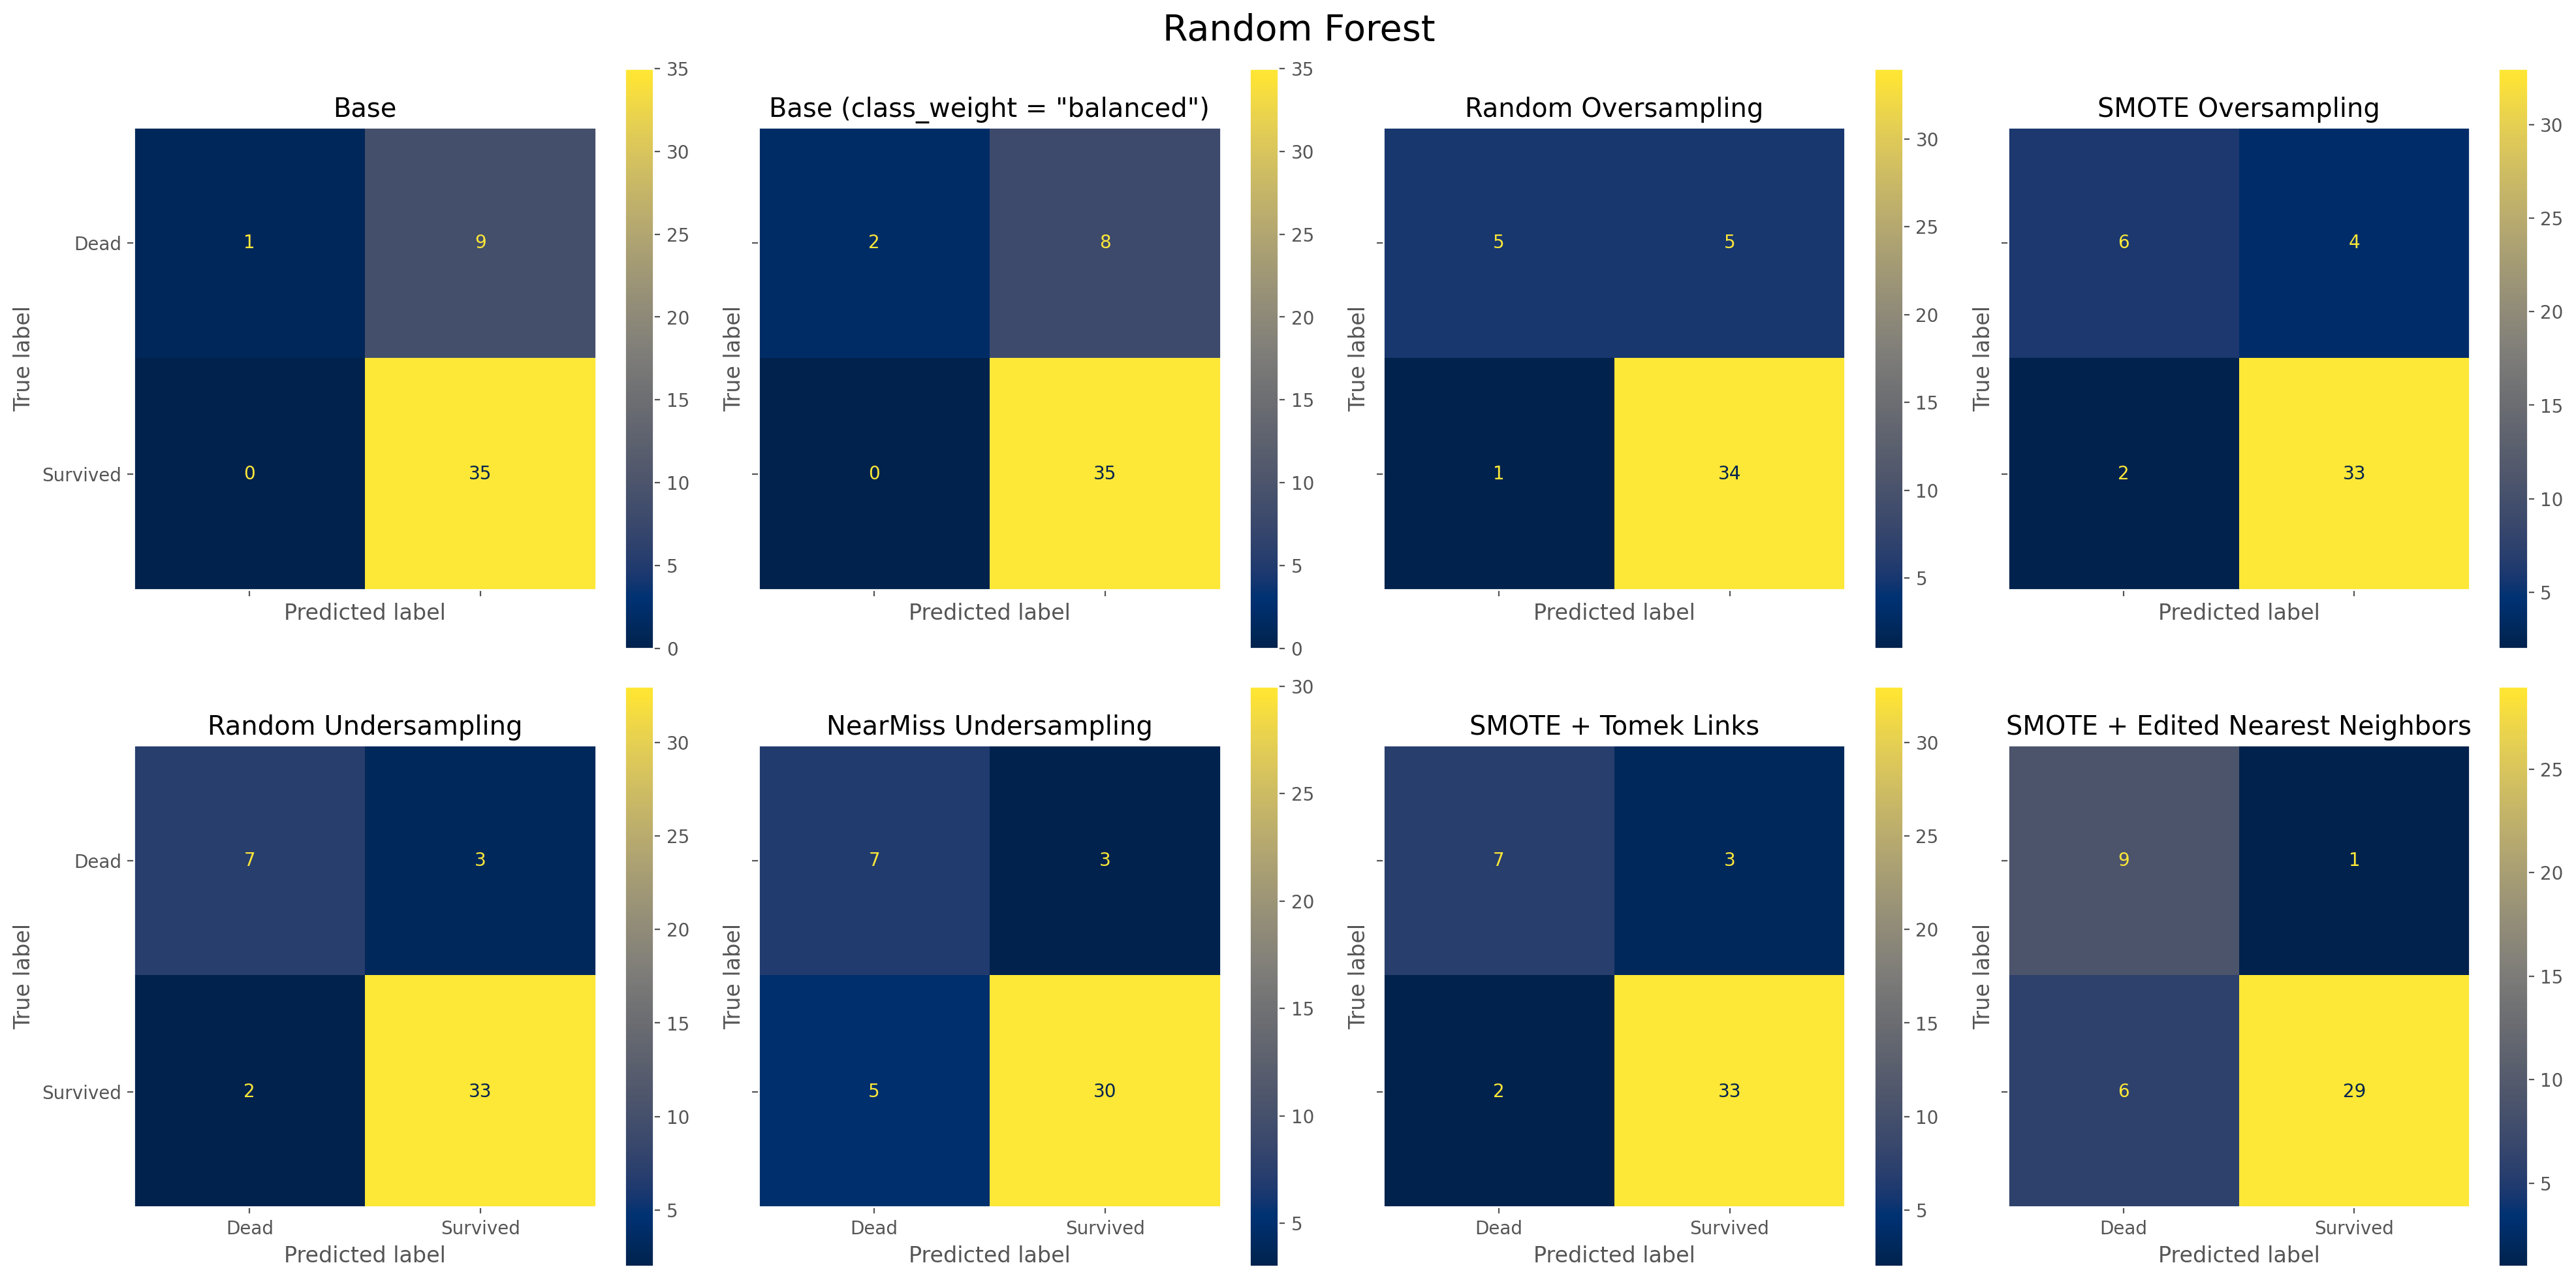

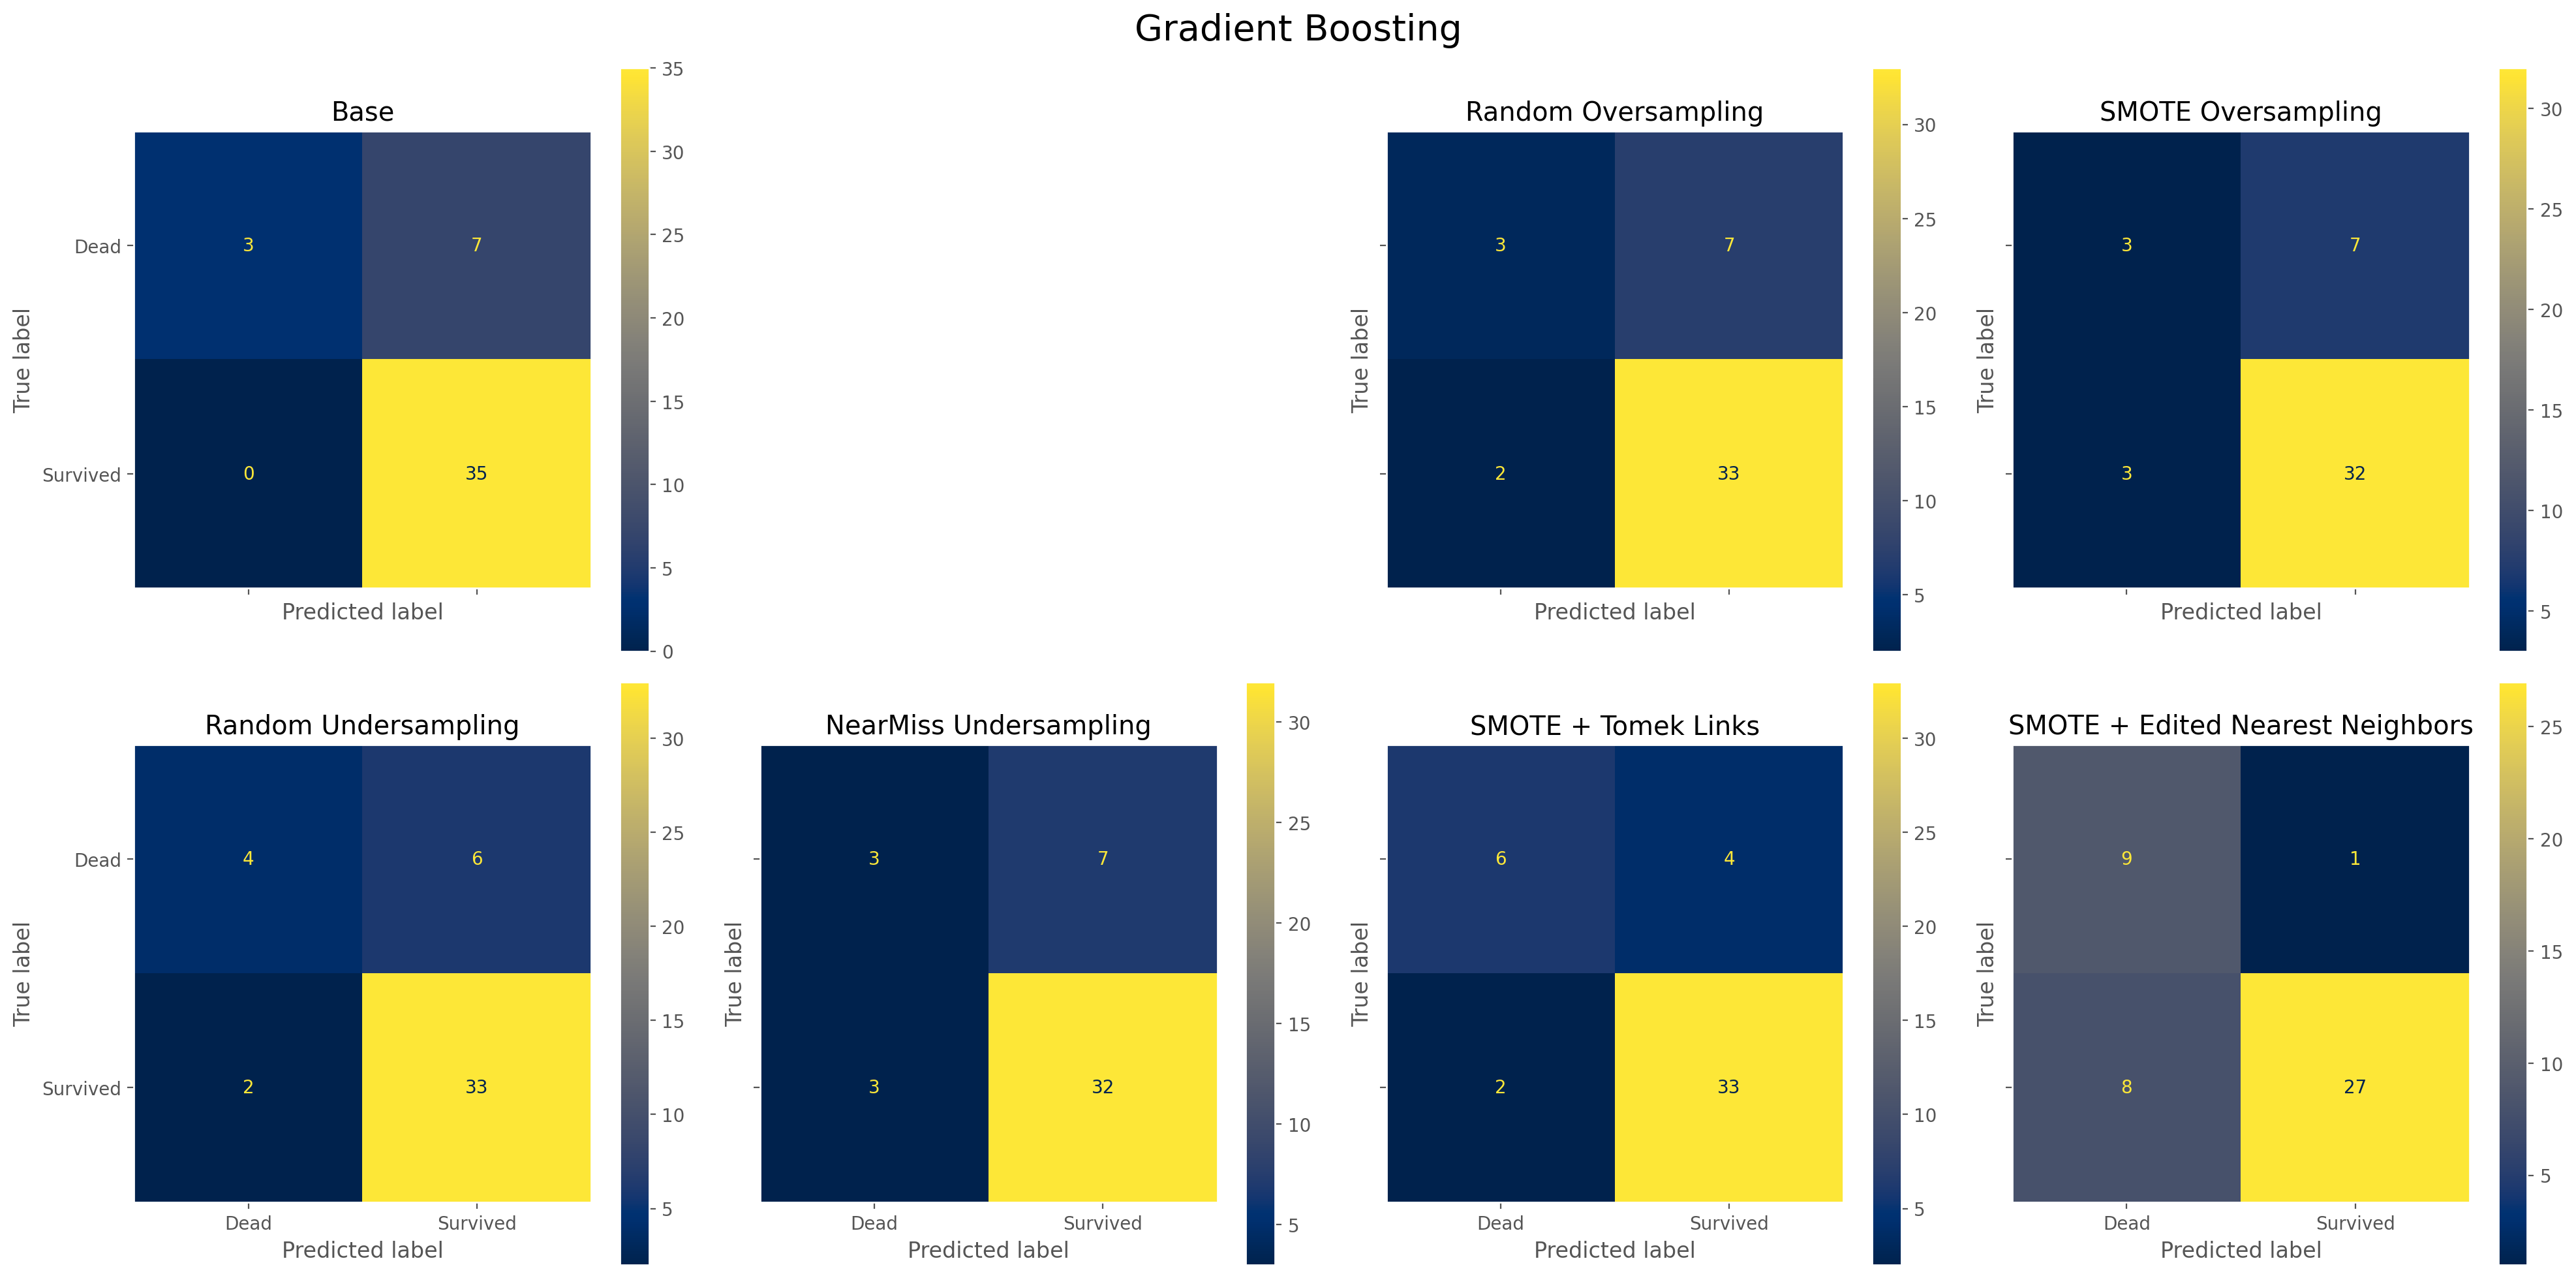

In [28]:
# Prepare predictions and titles for Random Forest and Gradient Boosting models
rf_preds = [rf_pred_base, rf_pred_base_balanced, rf_pred_ros, rf_pred_smote, rf_pred_rus, rf_pred_nearmiss, rf_pred_smotetomek, rf_pred_smoteenn]
rf_titles = [
    "Base", 'Base (class_weight = "balanced")', "Random Oversampling", "SMOTE Oversampling",
    "Random Undersampling", "NearMiss Undersampling", "SMOTE + Tomek Links", "SMOTE + Edited Nearest Neighbors"
]

gb_preds = [gb_pred_base, [""], gb_pred_ros, gb_pred_smote, gb_pred_rus, gb_pred_nearmiss, gb_pred_smotetomek, gb_pred_smoteenn]
gb_titles = [
    "Base", "", "Random Oversampling", "SMOTE Oversampling",
    "Random Undersampling", "NearMiss Undersampling", "SMOTE + Tomek Links", "SMOTE + Edited Nearest Neighbors"
]

# Iterate through Random Forest and Gradient Boosting models
for pred, title, suptitle in zip([rf_preds, gb_preds], [rf_titles, gb_titles], ["Random Forest", "Gradient Boosting"]):
    nrows, ncols = 2, 4
    fig, ax = plt.subplots(nrows, ncols, figsize=(20, 10), dpi=200, sharex=True, sharey=True)

    n = 0
    # Iterate through subplots
    for nrow in range(nrows):
        for ncol in range(ncols):
            # Check if the current model has only one prediction set (for Gradient Boosting with no class_weight)
            if len(pred[n]) == 1:
                pass
                n += 1
            else:
                # Plot confusion matrix using ConfusionMatrixDisplay with a pink-purple colormap
                ConfusionMatrixDisplay.from_predictions(y_test, pred[n], cmap="cividis", ax=ax[nrow, ncol])
                ax[nrow, ncol].set_title(title[n])
                ax[nrow, ncol].grid(False)
                n += 1

                # Break if all models are plotted
                if n == len(pred):
                    break

    # Remove empty subplots
    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    # Set main title
    plt.suptitle(suptitle, fontsize=20)
    plt.tight_layout()
    plt.show()

We can evaluate further by looking at the percentages of correct and incorrect predictions of every model. It's important to know that accuracy isn't always the best way to evaluate our models especially in an imbalanced dataset. It's advisable to use other metrics, such as precision, recall, and F1. On this graph, we'll focus at recall, which is the ratio between the numbers of positive samples correctly classified as positive to the total number of positive samples. We can see that out of all resampling methods, `the SMOTE + ENN method works the best on both Random Forest and Gradient Boosting models`.

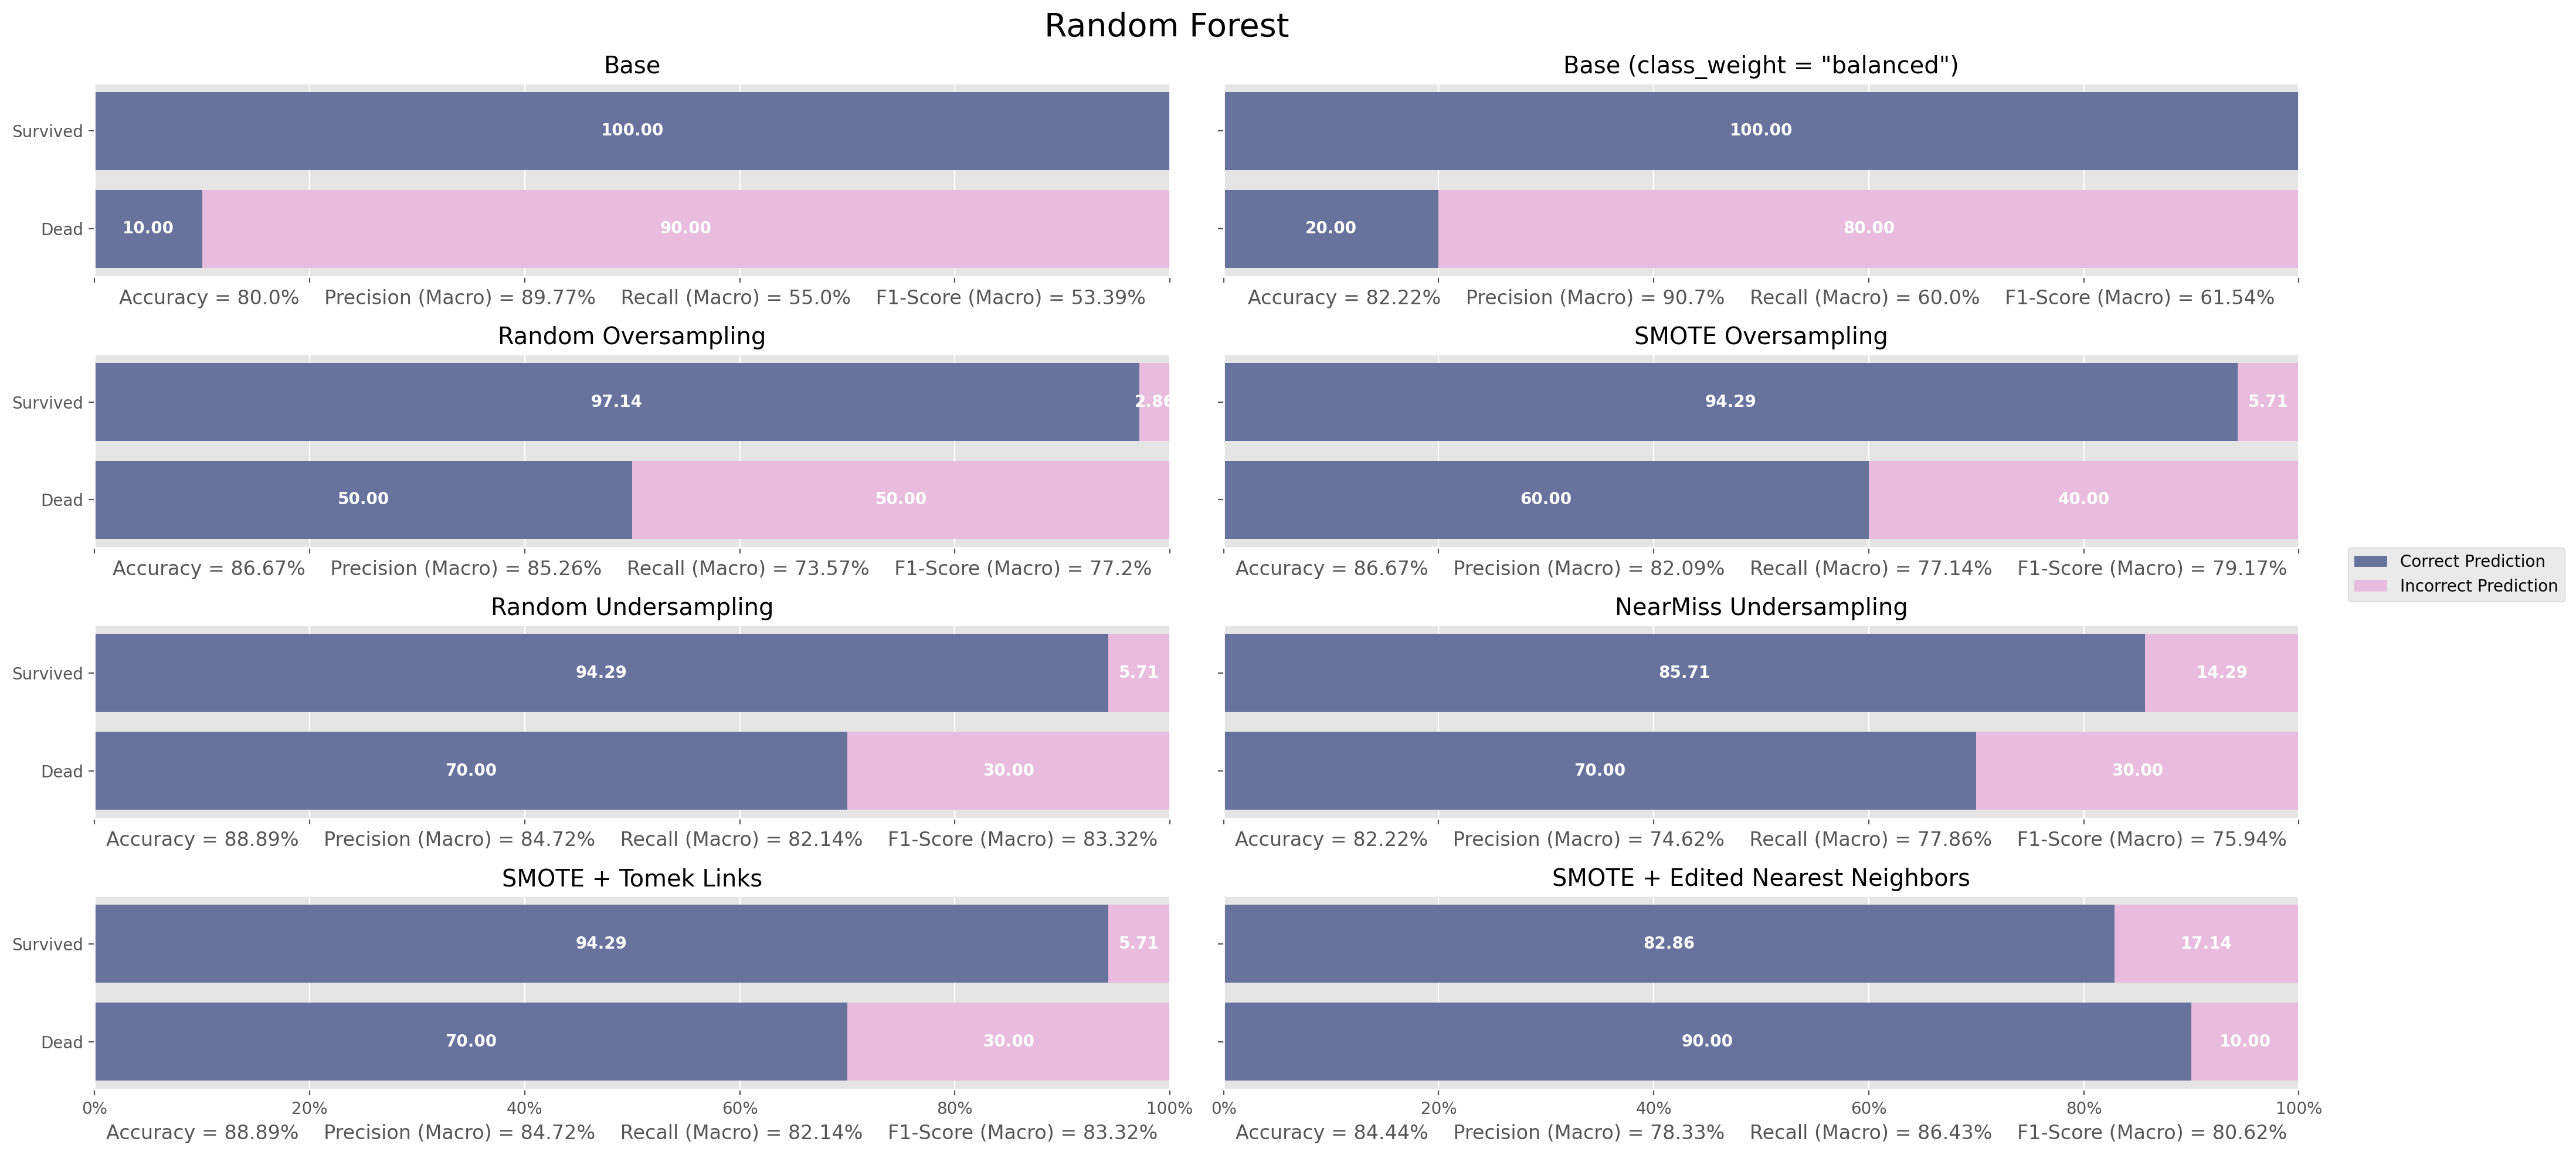

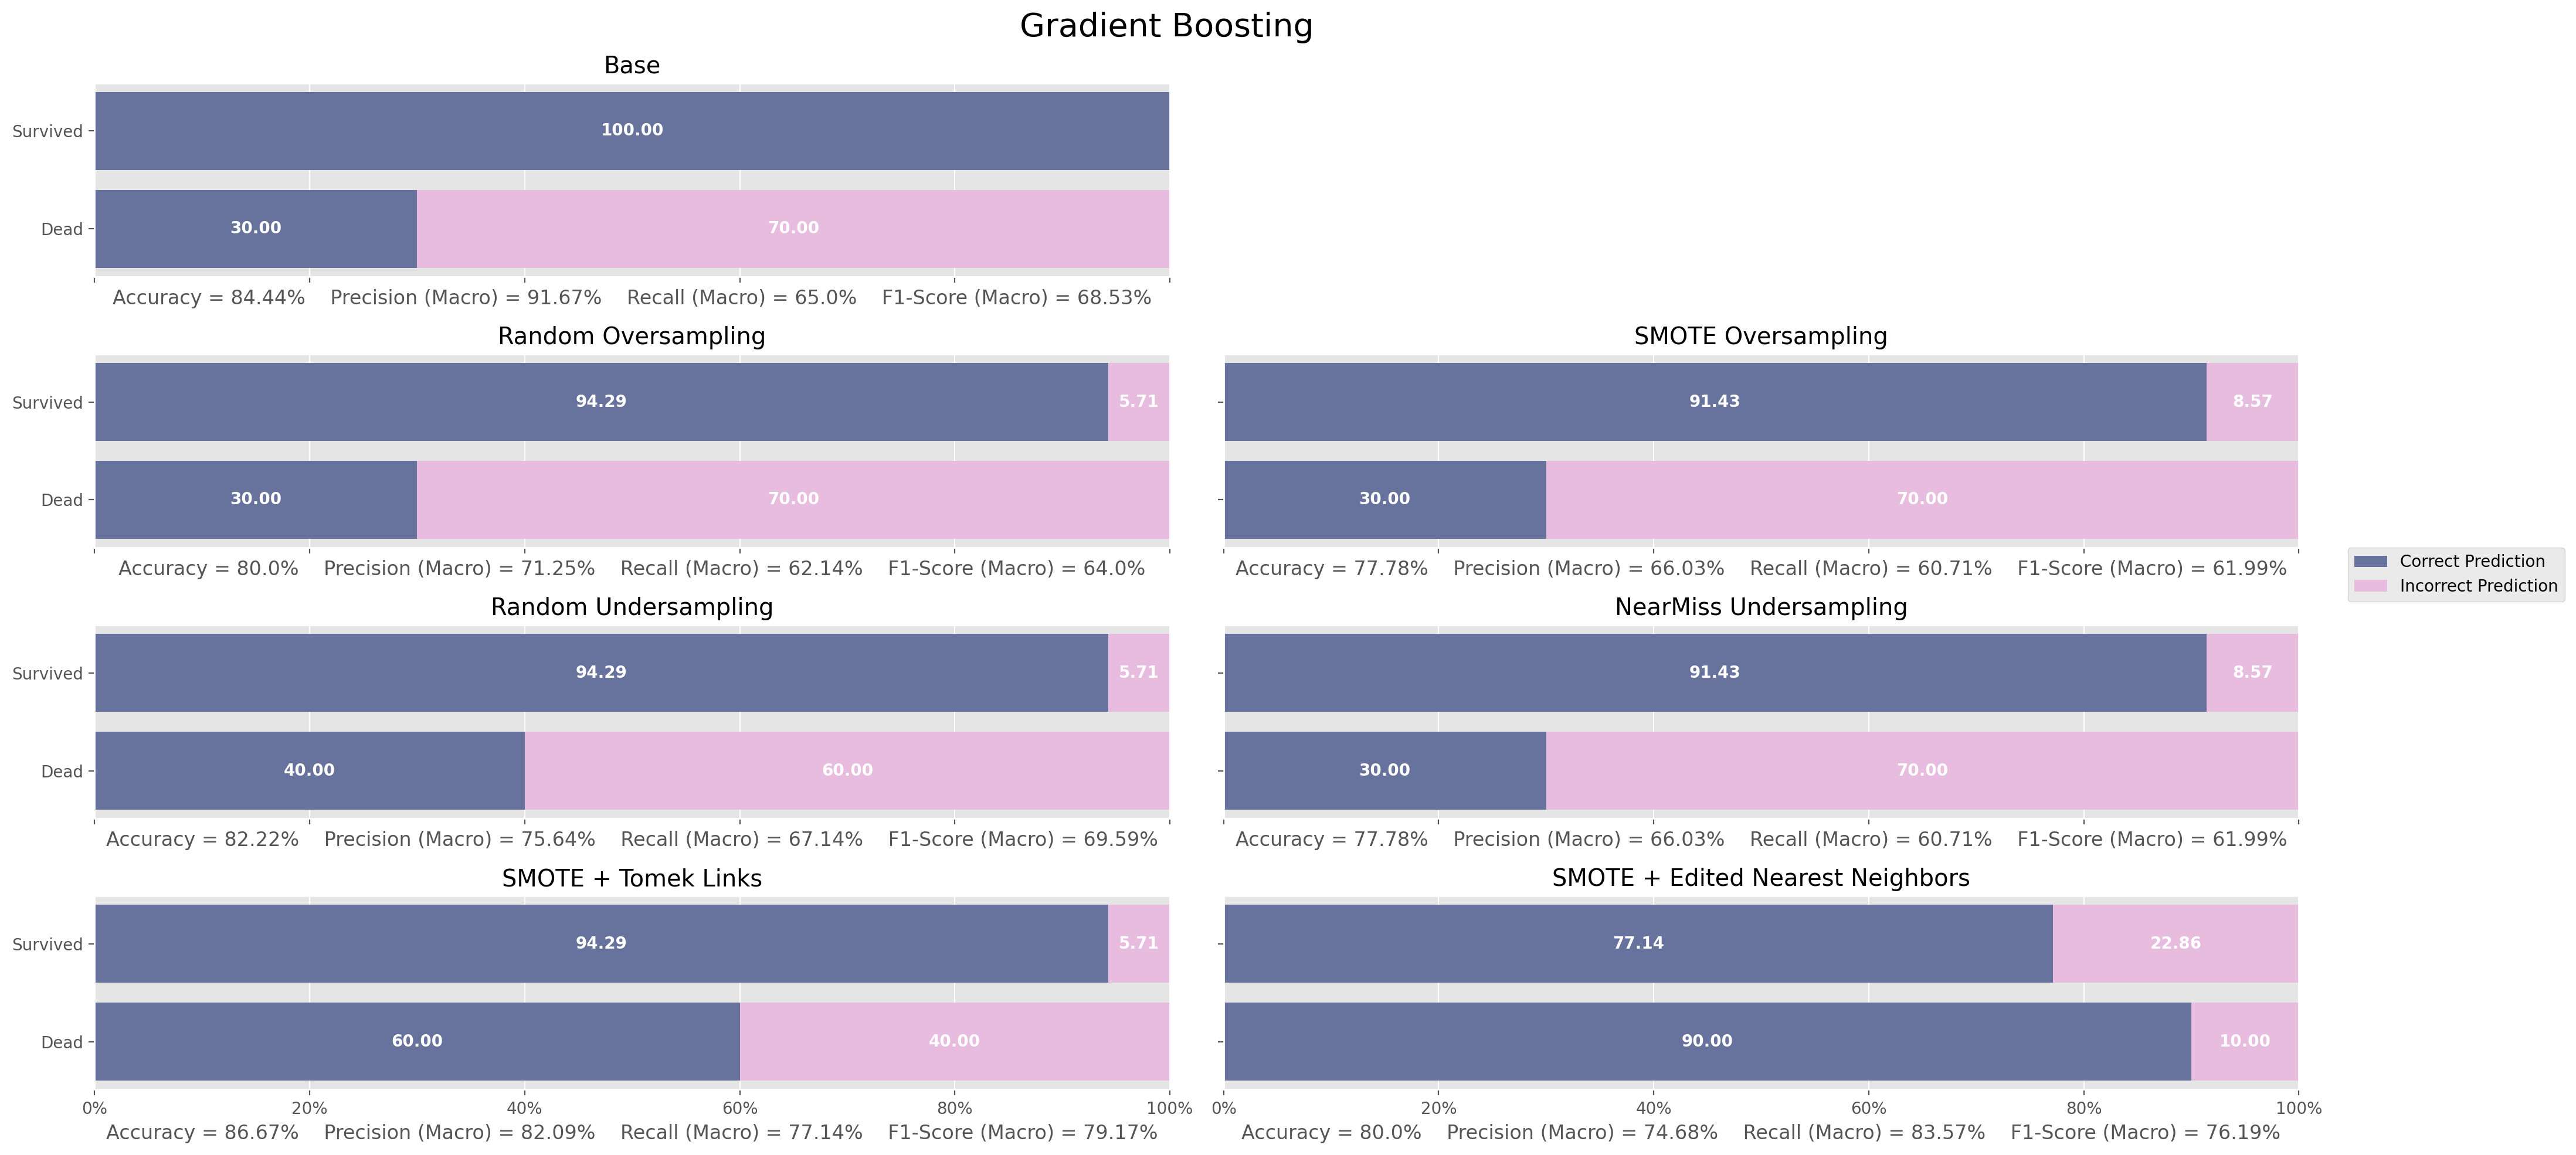

In [29]:
# Loop over predictions and titles for Random Forest and Gradient Boosting models
for pred, title, suptitle in zip([rf_preds, gb_preds], [rf_titles, gb_titles], ["Random Forest", "Gradient Boosting"]):
    nrows, ncols = 4, 2
    # Create subplots for displaying metrics
    fig, ax = plt.subplots(nrows, ncols, figsize=(20, 10), dpi=200, sharex=True, sharey=True)

    n = 0
    # Loop over subplot rows
    for nrow in range(nrows):
        # Loop over subplot columns
        for ncol in range(ncols):
            # Check if there is only one element in the prediction list
            if len(pred[n]) == 1:
                pass
                n += 1
            else:
                # Calculate metrics for the confusion matrix
                true_survived = recall_score(y_test, pred[n], pos_label="Survived") * 100
                false_survived = 100 - true_survived
                true_dead = recall_score(y_test, pred[n], pos_label="Dead") * 100
                false_dead = 100 - true_dead

                accuracy = accuracy_score(y_test, pred[n])
                precision = precision_score(y_test, pred[n], average="macro")
                recall = recall_score(y_test, pred[n], average="macro")
                f1 = f1_score(y_test, pred[n], average="macro")

                # Plot horizontal bar chart for true and false predictions
                if true_dead == 100:
                    ax[nrow, ncol].barh("Dead", true_dead, color="#67729D", label="Correct Prediction")
                    ax[nrow, ncol].barh("Survived", true_survived, color="#67729D")
                    ax[nrow, ncol].barh("Survived", false_survived, left=true_survived, color="#E7BCDE")
                elif false_dead == 100:
                    ax[nrow, ncol].barh("Dead", false_dead, color="#E7BCDE", label="Incorrect Prediction")
                    ax[nrow, ncol].barh("Survived", true_survived, color="#67729D")
                    ax[nrow, ncol].barh("Survived", false_survived, left=true_survived, color="#E7BCDE")
                elif true_survived == 100:
                    ax[nrow, ncol].barh("Dead", true_dead, color="#67729D", label="Correct Prediction")
                    ax[nrow, ncol].barh("Dead", false_dead, left=true_dead, color="#E7BCDE", label="Incorrect Prediction")
                    ax[nrow, ncol].barh("Survived", true_survived, color="#67729D")
                elif false_survived / (true_survived + false_survived) * 10 == 100:
                    ax[nrow, ncol].barh("Dead", true_dead, color="#67729D", label="Correct Prediction")
                    ax[nrow, ncol].barh("Dead", false_dead, left=true_dead, color="#E7BCDE", label="Incorrect Prediction")
                    ax[nrow, ncol].barh("Survived", false_survived, color="#E7BCDE")
                else:
                    ax[nrow, ncol].barh("Dead", true_dead, color="#67729D", label="Correct Prediction")
                    ax[nrow, ncol].barh("Dead", false_dead, left=true_dead, color="#E7BCDE", label="Incorrect Prediction")
                    ax[nrow, ncol].barh("Survived", true_survived, color="#67729D")
                    ax[nrow, ncol].barh("Survived", false_survived, left=true_survived, color="#E7BCDE")

                # Set title, xlim, and xlabel for each subplot
                ax[nrow, ncol].set_title(title[n])
                ax[nrow, ncol].set_xlim(xmax=100)
                ax[nrow, ncol].set_xlabel(
                    f"Accuracy = {round(accuracy * 100, 2)}%    Precision (Macro) = {round(precision * 100, 2)}%    Recall (Macro) = {round(recall * 100, 2)}%    F1-Score (Macro) = {round(f1 * 100, 2)}%"
                )

                # Add labels to the bars
                for container in ax[nrow, ncol].containers:
                    ax[nrow, ncol].bar_label(container, fmt="%.2f", label_type="center", color="white", fontweight="bold")

                n += 1

    # Set xticks and legend
    ax[nrow, ncol].set_xticks(np.arange(0, 101, 20), [f"{xtick}%" for xtick in np.arange(0, 101, 20)])
    handles, labels = ax[nrow, ncol].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc="center left")

    # Remove empty subplots
    for ax in ax.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

    # Set super title, adjust layout, and display the plot
    plt.suptitle(suptitle, fontsize=20)
    plt.tight_layout()
    plt.show()

In [30]:
# Create a DataFrame to display prediction probabilities, actual values, and conclusions for the first 10 instances
prediction_df = pd.DataFrame({
    "probability_survived": rf_proba_smoteenn[:, 1] * 100,  # Probability of belonging to the "Survived" class
    "probability_dead": rf_proba_smoteenn[:, 0] * 100,       # Probability of belonging to the "Dead" class
    "prediction": rf_pred_smoteenn,                          # Predicted class labels
    "actual": y_test,                                       # Actual class labels
    "conclusion": [True if i == j else False for i, j in zip(y_test, rf_pred_smoteenn)]  # Conclusion: True if prediction is correct, False otherwise
}).reset_index(drop=True).head(10)  # Display the first 10 rows

# Display the DataFrame
prediction_df

,probability_survived,probability_dead,prediction,actual,conclusion
0,66.0,34.0,Survived,Survived,True
1,87.0,13.0,Survived,Survived,True
2,61.0,39.0,Survived,Survived,True
3,30.0,70.0,Dead,Dead,True
4,43.0,57.0,Dead,Dead,True
5,82.0,18.0,Survived,Survived,True
6,85.0,15.0,Survived,Survived,True
7,41.0,59.0,Dead,Survived,False
8,8.0,92.0,Dead,Dead,True
9,29.0,71.0,Dead,Survived,False


In [31]:
# Create a DataFrame to display the predicted probabilities, predictions, actual values, and conclusions
pd.DataFrame({
    "probability_survived": gb_proba_smoteenn[:, 1] * 100,
    "probability_dead": gb_proba_smoteenn[:, 0] * 100,
    "prediction": gb_pred_smoteenn,
    "actual": y_test,
    "conclusion": [True if i == j else False for i, j in zip(y_test, gb_pred_smoteenn)]
}).reset_index(drop=True).head(10)

,probability_survived,probability_dead,prediction,actual,conclusion
0,2.333505,97.666495,Dead,Survived,False
1,99.982383,0.017617,Survived,Survived,True
2,84.785228,15.214772,Survived,Survived,True
3,2.806210,97.193790,Dead,Dead,True
4,3.903181,96.096819,Dead,Dead,True
5,99.990174,0.009826,Survived,Survived,True
6,99.897687,0.102313,Survived,Survived,True
7,54.050504,45.949496,Survived,Survived,True
8,0.006271,99.993729,Dead,Dead,True
9,0.657082,99.342918,Dead,Survived,False


# **Final Models**
The selected final model involves utilizing `SMOTE + ENN` as the optimal resampling method for this dataset, and we will apply this method to resample the entire dataset.
<hr>

In [32]:
# Instantiate the SMOTEENN (SMOTE + Edited Nearest Neighbors) object with a specified random state
smoteenn = SMOTEENN(random_state=random_state)

# Apply the SMOTEENN resampling technique to the feature matrix (X) and target variable (y)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X, y)

Create the final models by training them with the whole dataset that has been resampled.

In [33]:
# Random Forest
final_rf_model = RandomForestClassifier(random_state=random_state)
final_rf_model.fit(X_smoteenn,y_smoteenn)

# Gradient Boosting
final_gb_model = GradientBoostingClassifier(random_state=random_state)
final_gb_model.fit(X_smoteenn,y_smoteenn)

GradientBoostingClassifier(random_state=62)

Save the final models for future use.

In [34]:
models = [final_rf_model,final_gb_model]
names = ["randomforest_model","gradientboosting_model"]
extension = "json"

for model,name in zip(models,names):
    with open(f"{name}.{extension}","wb") as files:
        dump(model,files)
    print(f"{name}.{extension} has been downloaded")

randomforest_model.json has been downloaded
gradientboosting_model.json has been downloaded


# **Conclusion**
<hr>

Based on the project above, it can be concluded that `the SMOTE + ENN method balances the dataset really well and increases the performance of the models`.

The Random Forest model's predictions for Survival and Dead classes respectively are 82.86% and 90% correct while the Gradient Boosting model's are 77.14% and 90%. Since the Random Forest model has a slightly better performance than the Gradient Boosting model, it's advisable to use the former.

This project shows that ensemble methods in Machine Learning can be used effectively for binary classification of electronic health records of patients with cardiovascular heart diseases.